# Import needed libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

# Clean the datasets

## Life Expectancy Data

In [102]:
# load the data
df_life_expectancy =  pd.read_csv('data/Life Expectancy Data.csv')

In [103]:
# show the data
df_life_expectancy.iloc[0:]

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358879   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [104]:
# print data info
df_life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

 As we see there is a spacing and naming problem in the data attributes.
 So we will name them

In [105]:
# take a copy
# change the names and show the effect
df_life_expectancy_copy = df_life_expectancy.copy(deep=True)
df_life_expectancy_copy.rename(columns={'Life expectancy ':'Life expectancy','Adult Mortality':'Adult mortality','infant deaths':'Infant deaths',
                                   'percentage expenditure':'Percentage expenditure',' BMI ': 'BMI',
                                   'under-five deaths ':'Under-five deaths','Diphtheria ': 'Diphtheria',' HIV/AIDS':'HIV/AIDS',
                                   'GDP':'GDP',' thinness  1-19 years':'Thinness 10-19 years',
                                   ' thinness 5-9 years':'Thinness 5-9 years'},inplace=True)
df_life_expectancy_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

In [106]:
data_size = df_life_expectancy_copy.shape[0]*df_life_expectancy_copy.shape[1]
data_size

64636

In [107]:
df_life_expectancy_copy.describe(include='all')

Country         Year      Status  Life expectancy  \
count                       2938  2938.000000        2938      2928.000000   
unique                       193          NaN           2              NaN   
top     United States of America          NaN  Developing              NaN   
freq                          16          NaN        2426              NaN   
mean                         NaN  2007.518720         NaN        69.224932   
std                          NaN     4.613841         NaN         9.523867   
min                          NaN  2000.000000         NaN        36.300000   
25%                          NaN  2004.000000         NaN        63.100000   
50%                          NaN  2008.000000         NaN        72.100000   
75%                          NaN  2012.000000         NaN        75.700000   
max                          NaN  2015.000000         NaN        89.000000   

        Adult mortality  Infant deaths      Alcohol  Percentage expenditure  \
count       2928.000000    2938.000000  2744.000000             2938.000000   
unique              NaN            NaN          NaN                     NaN   
top                 NaN            NaN          NaN                     NaN   
freq                NaN            NaN          NaN                     NaN   
mean         164.796448      30.303948     4.602861              738.251295   
std          124.292079     117.926501     4.052413             1987.914858   
min            1.000000       0.000000     0.010000                0.000000   
25%           74.000000       0.000000     0.877500                4.685343   
50%          144.000000       3.000000     3.755000               64.912906   
75%          228.000000      22.000000     7.702500              441.534144   
max          723.000000    1800.000000    17.870000            19479.911610   

        Hepatitis B       Measles   ...        Polio  Total expenditure  \
count   2385.000000    2938.000000  ...  2919.000000         2712.00000   
unique          NaN            NaN  ...          NaN                NaN   
top             NaN            NaN  ...          NaN                NaN   
freq            NaN            NaN  ...          NaN                NaN   
mean      80.940461    2419.592240  ...    82.550188            5.93819   
std       25.070016   11467.272489  ...    23.428046            2.49832   
min        1.000000       0.000000  ...     3.000000            0.37000   
25%       77.000000       0.000000  ...    78.000000            4.26000   
50%       92.000000      17.000000  ...    93.000000            5.75500   
75%       97.000000     360.250000  ...    97.000000            7.49250   
max       99.000000  212183.000000  ...    99.000000           17.60000   

         Diphtheria     HIV/AIDS            GDP    Population  \
count   2919.000000  2938.000000    2490.000000  2.286000e+03   
unique          NaN          NaN            NaN           NaN   
top             NaN          NaN            NaN           NaN   
freq            NaN          NaN            NaN           NaN   
mean      82.324084     1.742103    7483.158469  1.275338e+07   
std       23.716912     5.077785   14270.169342  6.101210e+07   
min        2.000000     0.100000       1.681350  3.400000e+01   
25%       78.000000     0.100000     463.935626  1.957932e+05   
50%       93.000000     0.100000    1766.947595  1.386542e+06   
75%       97.000000     0.800000    5910.806335  7.420359e+06   
max       99.000000    50.600000  119172.741800  1.293859e+09   

        Thinness 10-19 years  Thinness 5-9 years  \
count            2904.000000         2904.000000   
unique                   NaN                 NaN   
top                      NaN                 NaN   
freq                     NaN                 NaN   
mean                4.839704            4.870317   
std                 4.420195            4.508882   
min                 0.100000            0.100000   
25%                 1.600000            1

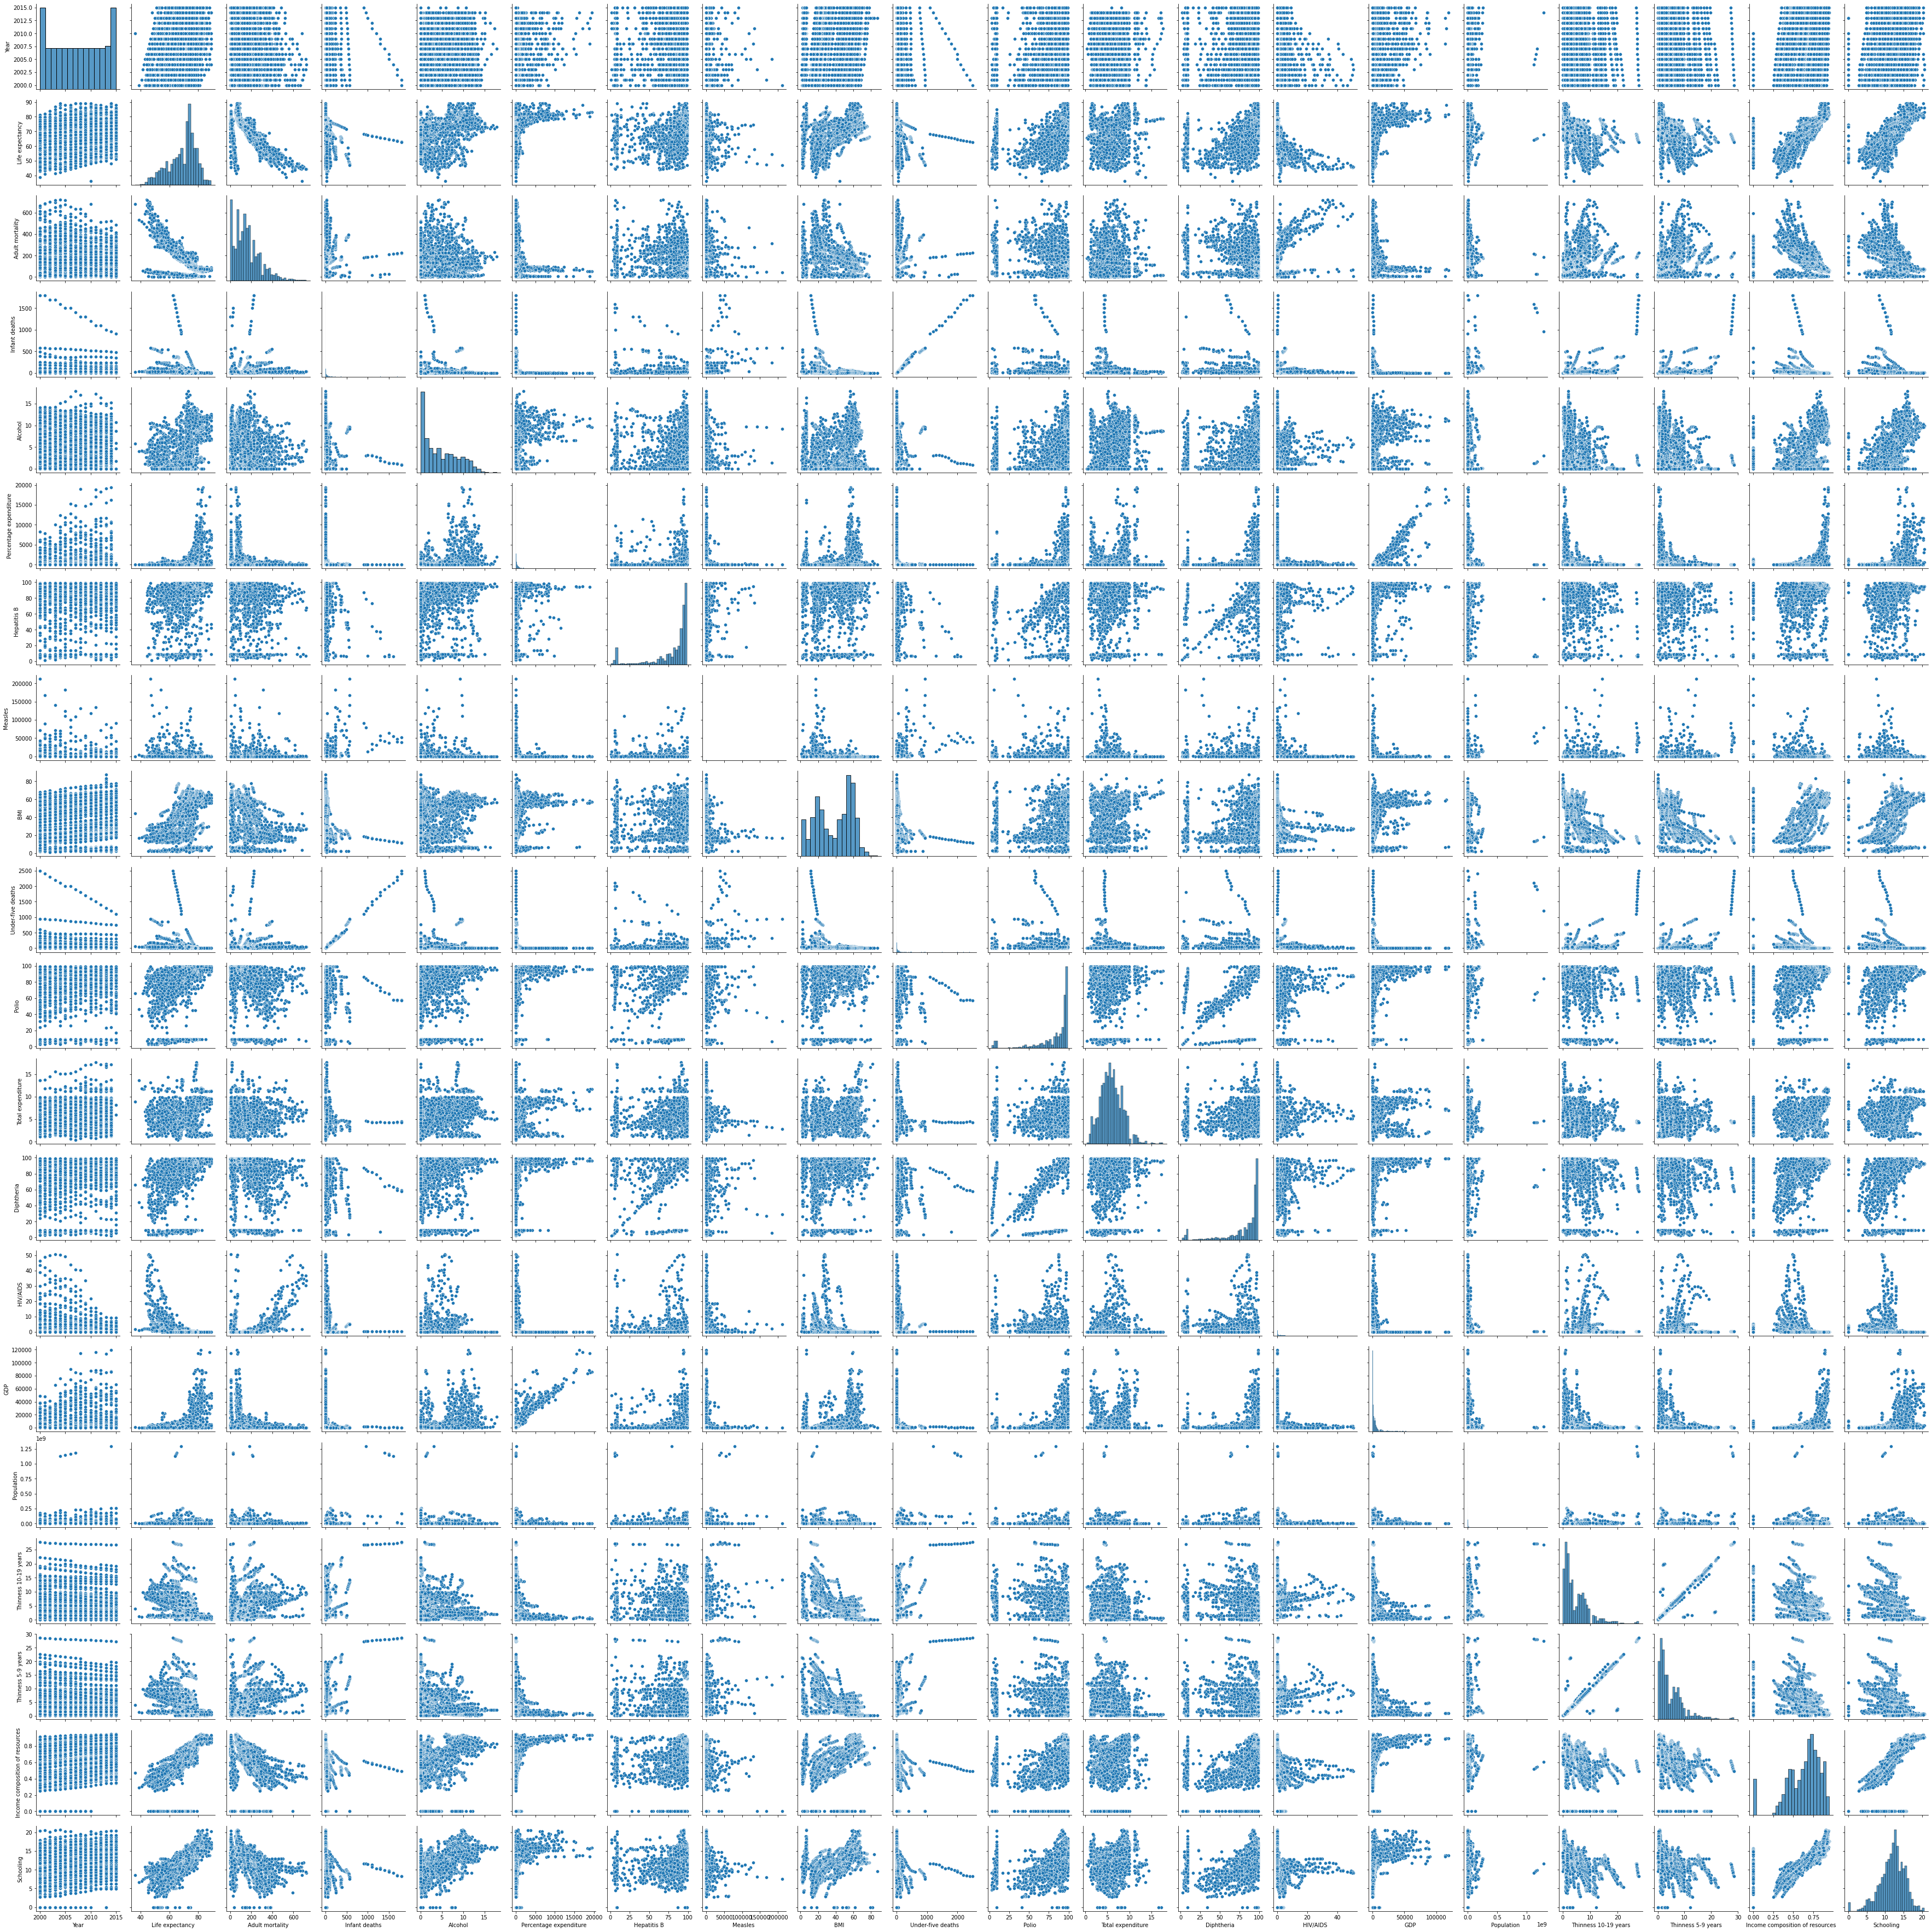

In [108]:
# show the relationship between the attributes
sns.pairplot(df_life_expectancy_copy) 

<AxesSubplot:>

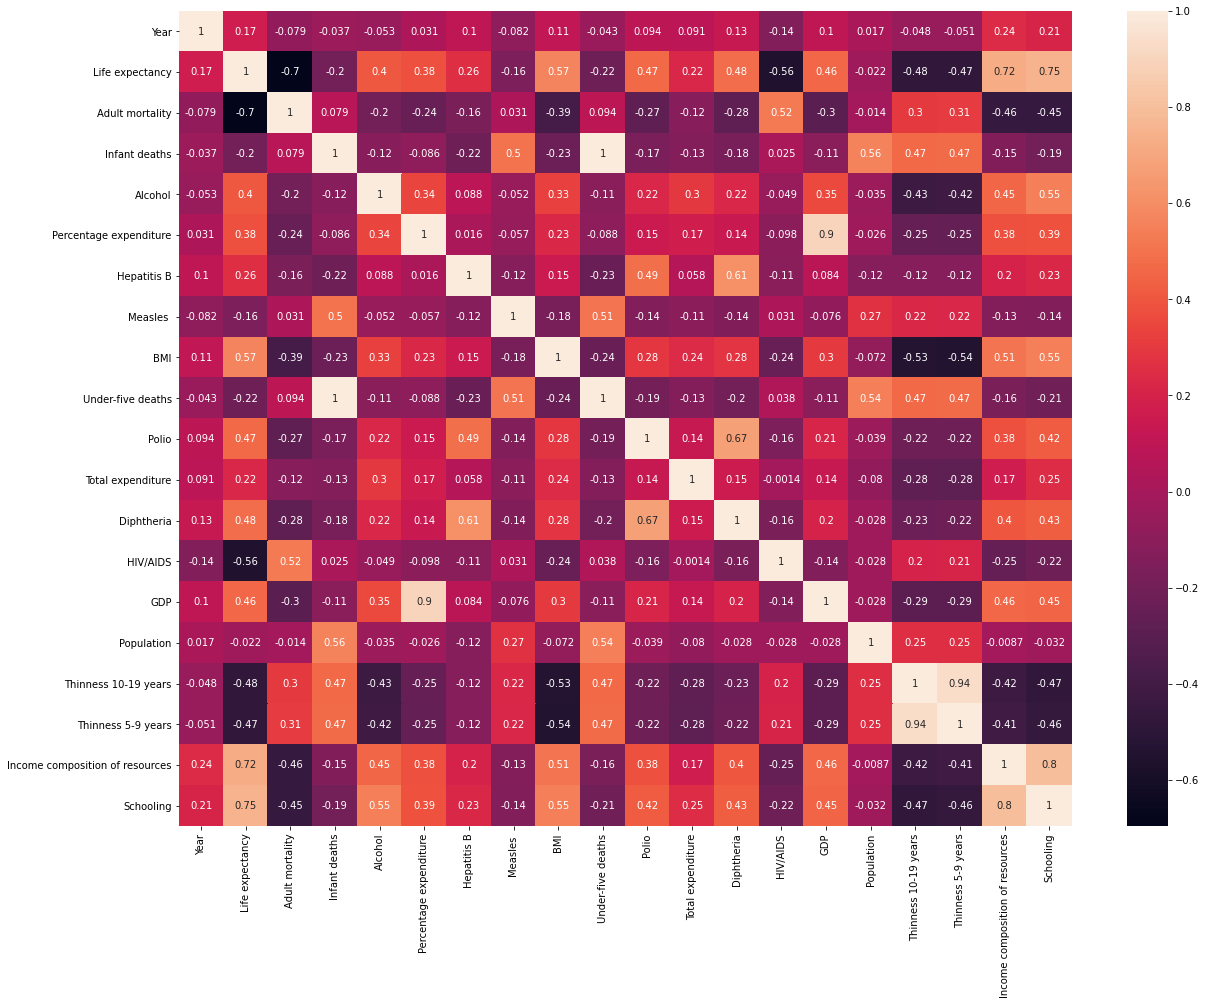

In [109]:
# lets see how different values are correlated.
plt.figure(figsize = (20,15))
sns.heatmap(df_life_expectancy_copy.corr(),annot = True)

as we could see from the figure we could found that:
Life expectancy, Total expenditure, Schooling has a normal distribution

and these pair of attributes has a positive correlation
> Income composition of resources & Schooling

> Thinness 10-19 years & Thinness 5-9 years

> Under-five deaths & Under-five deaths

> Percentage expenditure & GDP

there are two features that we could melt Thinness 10-19 years & Thinness 5-9 years but we chose to let it. As if we melt them this will create a lot of redundant values.

In [110]:
# show number of null data
df_life_expectancy_copy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 10-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [111]:
missing_values_count_life_expectancy = df_life_expectancy_copy.isnull().sum()
total_cells_life_expectancy = np.product(df_life_expectancy_copy.shape) 
total_missing_life_expectancy = missing_values_count_life_expectancy.sum()

# percent of data that is missing
percentage_missign_values_life_expectancy = (total_missing_life_expectancy/total_cells_life_expectancy) * 100
percentage_missign_values_life_expectancy

3.965282505105514

The percentage of the null values is greater than 3% so we can not drop the null.
we will start to fill some null values

let's start by Alcohol attribute

In [112]:
# show records with null in alcohol
df_life_expectancy_alcohol_null = df_life_expectancy_copy[df_life_expectancy_copy['Alcohol'].isnull()]
df_life_expectancy_alcohol_null

Country  Year      Status  Life expectancy  \
32                               Algeria  2015  Developing             75.6   
48                                Angola  2015  Developing             52.4   
64                   Antigua and Barbuda  2015  Developing             76.4   
80                             Argentina  2015  Developing             76.3   
96                               Armenia  2015  Developing             74.8   
...                                  ...   ...         ...              ...   
2858  Venezuela (Bolivarian Republic of)  2015  Developing             74.1   
2874                            Viet Nam  2015  Developing             76.0   
2890                               Yemen  2015  Developing             65.7   
2906                              Zambia  2015  Developing             61.8   
2922                            Zimbabwe  2015  Developing             67.0   

      Adult mortality  Infant deaths  Alcohol  Percentage expenditure  \
32               19.0             21      NaN                     0.0   
48              335.0             66      NaN                     0.0   
64               13.0              0      NaN                     0.0   
80              116.0              8      NaN                     0.0   
96              118.0              1      NaN                     0.0   
...               ...            ...      ...                     ...   
2858            157.0              9      NaN                     0.0   
2874            127.0             28      NaN                     0.0   
2890            224.0             37      NaN                     0.0   
2906             33.0             27      NaN                     0.0   
2922            336.0             22      NaN                     0.0   

      Hepatitis B  Measles   ...  Polio  Total expenditure  Diphtheria  \
32           95.0        63  ...   95.0                NaN        95.0   
48           64.0       118  ...    7.0                NaN        64.0   
64           99.0         0  ...   86.0                NaN        99.0   
80           94.0         0  ...   93.0                NaN        94.0   
96           94.0        33  ...   96.0                NaN        94.0   
...           ...       ...  ...    ...                ...         ...   
2858         87.0         0  ...   87.0                NaN        87.0   
2874         97.0       256  ...   97.0                NaN        97.0   
2890         69.0       468  ...   63.0                NaN        69.0   
2906          9.0         9  ...    9.0                NaN         9.0   
2922         87.0         0  ...   88.0                NaN        87.0   

      HIV/AIDS           GDP  Population  Thinness 10-19 years  \
32         0.1   4132.762920  39871528.0                   6.0   
48         1.9   3695.793748   2785935.0                   8.3   
64         0.2  13566.954100         NaN                   3.3   
80         0.1  13467.123600  43417765.0                   1.0   
96         0.1    369.654776    291695.0                   2.1   
...        ...           ...         ...                   ...   
2858       0.1           NaN         NaN                   1.6   
2874       0.1           NaN         NaN                  14.2   
2890       0.1           NaN         NaN                  13.6   
2906       4.1   1313.889646    161587.0                   6.3   
2922       6.2    118.693830  15777451.0                   5.6   

      Thinness 5-9 years  Income composition of resources  Schooling  
32                   5.8                            0.743       14.4  
48                   8.2                            0.531       11.4  
64                   3.3                            0.784       13.9  
80                   0.9                            0.826       17.3  
96                   2.2                            0.741       12.7  
...                  ...                              ...        ...  
2858                 1.5    

In [113]:
df_life_expectancy_copy[df_life_expectancy_copy['Country'] == 'Algeria'][['Year','Alcohol']]

Year  Alcohol
32  2015      NaN
33  2014     0.01
34  2013     0.53
35  2012     0.66
36  2011     0.56
37  2010     0.45
38  2009     0.50
39  2008     0.46
40  2007     0.44
41  2006     0.36
42  2005     0.50
43  2004     0.45
44  2003     0.34
45  2002     0.36
46  2001     0.23
47  2000     0.25

As we found from the last data frame that there are some null values that could be missing from the single country data.

and as we know that alcohol attribute differ from country to another and we could not get values from another country to apply on this country we will apply the data we get from each country into its null value

but what value we will choose to fill null data 
let's plot the histograms and decide

Text(0.5, 1.0, 'Angola')

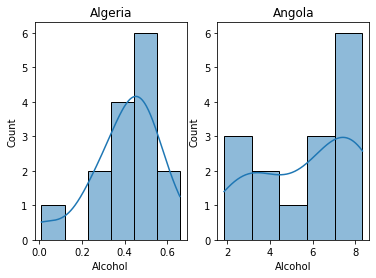

In [114]:
_, ax =plt.subplots(1,2)
sns.histplot(df_life_expectancy_copy[df_life_expectancy_copy['Country']=='Algeria']['Alcohol'],kde=True,ax=ax[0]).set_title('Algeria')
sns.histplot(df_life_expectancy_copy[df_life_expectancy_copy['Country']=='Angola']['Alcohol'],kde=True,ax=ax[1]).set_title('Angola')

We plot the histogram for the first two countries that appear in the null data for alcohol attribute and as we can see one of them is normal distribution but the second is not so we will use the median to fill the null values.

In [115]:
df_life_expectancy_copy['Alcohol'] = df_life_expectancy_copy.groupby('Country')['Alcohol'].apply(lambda x: x.fillna(x.median()))

c:\users\innovator\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [116]:
# show the number of nulls after filling
df_life_expectancy_copy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult mortality                     10
Infant deaths                        0
Alcohol                             17
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 10-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

We could see that there are 17 null value still in the alcohol attribute and this for the countries that did not have any value in this attribute all of them is null.

Let's fill Hepatitis B null values

In [117]:
df_life_expectancy_Hepatitis_B_null = df_life_expectancy_copy[df_life_expectancy_copy['Hepatitis B'].isnull()]
df_life_expectancy_Hepatitis_B_null

Country  Year      Status  Life expectancy  Adult mortality  \
44    Algeria  2003  Developing             71.7            146.0   
45    Algeria  2002  Developing             71.6            145.0   
46    Algeria  2001  Developing             71.4            145.0   
47    Algeria  2000  Developing             71.3            145.0   
57     Angola  2006  Developing             47.7            381.0   
...       ...   ...         ...              ...              ...   
2917   Zambia  2004  Developing             47.9            578.0   
2918   Zambia  2003  Developing             46.4             64.0   
2919   Zambia  2002  Developing             45.5             69.0   
2920   Zambia  2001  Developing             44.6            611.0   
2921   Zambia  2000  Developing             43.8            614.0   

      Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles   \
44               20     0.34               25.018523          NaN     15374   
45               20     0.36              148.511984          NaN      5862   
46               20     0.23              147.986071          NaN      2686   
47               21     0.25              154.455944          NaN         0   
57               90     5.84               25.086888          NaN       765   
...             ...      ...                     ...          ...       ...   
2917             36     2.46                8.369852          NaN        35   
2918             39     2.33               65.789974          NaN       881   
2919             41     2.44               54.043480          NaN     25036   
2920             43     2.61               46.830275          NaN     16997   
2921             44     2.62               45.616880          NaN     30930   

      ...  Polio  Total expenditure  Diphtheria  HIV/AIDS          GDP  \
44    ...   87.0               3.60        87.0       0.1   294.335560   
45    ...   86.0               3.73        86.0       0.1  1774.336730   
46    ...   89.0               3.84        89.0       0.1  1732.857979   
47    ...   86.0               3.49        86.0       0.1  1757.177970   
57    ...   36.0               4.54        34.0       2.5   262.415149   
...   ...    ...                ...         ...       ...          ...   
2917  ...   84.0               7.33        83.0      17.6    53.277222   
2918  ...   85.0               8.18        83.0      18.2   429.158343   
2919  ...   85.0               6.93        84.0      18.4   377.135244   
2920  ...   86.0               6.56        85.0      18.6   378.273624   
2921  ...   85.0               7.16        85.0      18.7   341.955625   

      Population  Thinness 10-19 years  Thinness 5-9 years  \
44     3243514.0                   6.3                 6.1   
45     3199546.0                   6.3                 6.2   
46    31592153.0                   6.4                 6.3   
47     3118366.0                   6.5                 6.4   
57     2262399.0                   9.8                 9.7   
...          ...                   ...                 ...   
2917  11731746.0                   7.2                 7.1   
2918  11421984.0                   7.3                 7.2   
2919    111249.0                   7.4                 7.3   
2920   1824125.0                   7.4                 7.4   
2921   1531221.0                   7.5                 7.5   

      Income composition of resources  Schooling  
44                              0.663       11.5  
45                              0.653       11.1  
46                              0.644       10.9  
47                              0.636       10.7  
57                              0.439        7.2  
...                               ...        ...  
2917                            0.456       10.5  
2918                            0.443       10.2  
2919                            0.433       10.0  
2920                            0.424        9.8  
2921                            0

In [118]:
df_life_expectancy_copy[df_life_expectancy_copy['Country'] == 'Algeria'][['Year','Hepatitis B']]

Year  Hepatitis B
32  2015         95.0
33  2014         95.0
34  2013         95.0
35  2012         95.0
36  2011         95.0
37  2010         95.0
38  2009         94.0
39  2008         91.0
40  2007          9.0
41  2006          8.0
42  2005         83.0
43  2004         81.0
44  2003          NaN
45  2002          NaN
46  2001          NaN
47  2000          NaN

as we could see this attribute is like the alcohol attribute we can fill the null values with the median of the country values

In [119]:
df_life_expectancy_copy['Hepatitis B'] = df_life_expectancy_copy.groupby('Country')['Hepatitis B'].apply(lambda x: x.fillna(x.median()))

c:\users\innovator\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [120]:
df_life_expectancy_copy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult mortality                     10
Infant deaths                        0
Alcohol                             17
Percentage expenditure               0
Hepatitis B                        144
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 10-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

this 114 is still here as there are some countries with now values.

We could make this step with the others attributes which has null values impute their values with values of the same country

In [121]:
df_life_expectancy_copy['Life expectancy'] = df_life_expectancy_copy.groupby('Country')['Life expectancy'].apply(lambda x: x.fillna(x.median()))
df_life_expectancy_copy['Adult mortality'] = df_life_expectancy_copy.groupby('Country')['Adult mortality'].apply(lambda x: x.fillna(x.median()))
df_life_expectancy_copy['BMI'] = df_life_expectancy_copy.groupby('Country')['BMI'].apply(lambda x: x.fillna(x.median()))
df_life_expectancy_copy['Polio'] = df_life_expectancy_copy.groupby('Country')['Polio'].apply(lambda x: x.fillna(x.median()))
df_life_expectancy_copy['Total expenditure'] = df_life_expectancy_copy.groupby('Country')['Total expenditure'].apply(lambda x: x.fillna(x.median()))
df_life_expectancy_copy['Diphtheria'] = df_life_expectancy_copy.groupby('Country')['Diphtheria'].apply(lambda x: x.fillna(x.median()))
df_life_expectancy_copy['GDP'] = df_life_expectancy_copy.groupby('Country')['GDP'].apply(lambda x: x.fillna(x.median()))
df_life_expectancy_copy['Thinness 10-19 years'] = df_life_expectancy_copy.groupby('Country')['Thinness 10-19 years'].apply(lambda x: x.fillna(x.median()))
df_life_expectancy_copy['Thinness 5-9 years'] = df_life_expectancy_copy.groupby('Country')['Thinness 5-9 years'].apply(lambda x: x.fillna(x.median()))
df_life_expectancy_copy['Income composition of resources'] = df_life_expectancy_copy.groupby('Country')['Income composition of resources'].apply(lambda x: x.fillna(x.median()))
df_life_expectancy_copy['Schooling'] = df_life_expectancy_copy.groupby('Country')['Schooling'].apply(lambda x: x.fillna(x.median()))

In [122]:
df_life_expectancy_copy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult mortality                     10
Infant deaths                        0
Alcohol                             17
Percentage expenditure               0
Hepatitis B                        144
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
HIV/AIDS                             0
GDP                                405
Population                         652
Thinness 10-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

This attribute is not effected wich mean their value did not record for the entire country:
Life expectancy, Adult mortality, BMI, Thinness 10-19 years, Thinness 5-9 years, Income composition of resources, and Schooling

We can drop the records which has relatively small number of nulls

In [123]:
life_ecpectancy_null_index = df_life_expectancy_copy[df_life_expectancy_copy['Life expectancy'].isnull()].index
df_life_expectancy_copy = df_life_expectancy_copy.drop(life_ecpectancy_null_index)
adult_mortality_null_index = df_life_expectancy_copy[df_life_expectancy_copy['Adult mortality'].isnull()].index
df_life_expectancy_copy = df_life_expectancy_copy.drop(adult_mortality_null_index)
alcohol_null_index = df_life_expectancy_copy[df_life_expectancy_copy['Alcohol'].isnull()].index
df_life_expectancy_copy = df_life_expectancy_copy.drop(alcohol_null_index)
BMI_null_index = df_life_expectancy_copy[df_life_expectancy_copy['BMI'].isnull()].index
df_life_expectancy_copy = df_life_expectancy_copy.drop(BMI_null_index)
total_expenditure_null_index = df_life_expectancy_copy[df_life_expectancy_copy['Total expenditure'].isnull()].index
df_life_expectancy_copy = df_life_expectancy_copy.drop(total_expenditure_null_index)
thinness_10_19_years_null_index = df_life_expectancy_copy[df_life_expectancy_copy['Thinness 10-19 years'].isnull()].index
df_life_expectancy_copy = df_life_expectancy_copy.drop(thinness_10_19_years_null_index)
thinness_5_9_years_null_index = df_life_expectancy_copy[df_life_expectancy_copy['Thinness 5-9 years'].isnull()].index
df_life_expectancy_copy = df_life_expectancy_copy.drop(thinness_5_9_years_null_index)

In [124]:
print(df_life_expectancy_copy.shape)
df_life_expectancy_copy.isnull().sum()

(2864, 22)


Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult mortality                      0
Infant deaths                        0
Alcohol                              0
Percentage expenditure               0
Hepatitis B                        144
Measles                              0
BMI                                  0
Under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                384
Population                         612
Thinness 10-19 years                 0
Thinness 5-9 years                   0
Income composition of resources    128
Schooling                          128
dtype: int64

now we see the correlation between two columns. for example, column X is highly correlated to column Y. Now, if column X has null values and column Y is filled fully, then column X can be filled using column Y

as we see from the heatmap we could find that Hepatitis B is highly correlated with Diphtheria and Diphtheria is fully filled. so lets show there scatter

<AxesSubplot:xlabel='Hepatitis B', ylabel='Diphtheria'>

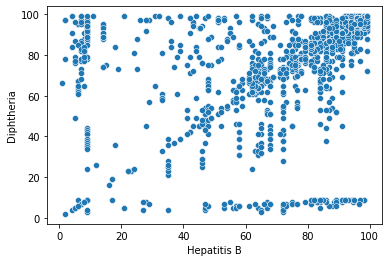

In [125]:
sns.scatterplot(data=df_life_expectancy_copy,x='Hepatitis B',y='Diphtheria')

We could see some relation between the columns. so we will use linear regression to fill the null values.

In [126]:
def regression(x,y,test):
    model = LinearRegression()
    model.fit(x, y)
    coefficient = model.score(x, y)
    print('coefficient of determination:', coefficient)
    return model.predict(test)

In [127]:
x = df_life_expectancy_copy[df_life_expectancy_copy['Hepatitis B'].notnull()]['Diphtheria'].values.reshape((-1, 1))
y = df_life_expectancy_copy[df_life_expectancy_copy['Hepatitis B'].notnull()]['Hepatitis B']
test = df_life_expectancy_copy[df_life_expectancy_copy['Hepatitis B'].isnull()]['Diphtheria'].values.reshape((-1, 1))
y_pred = regression(x,y,test)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.32482810238405124
predicted response:
[86.48014699 87.07593646 87.07593646 87.07593646 85.28856806 36.43383171
 84.09698912 83.50119966 82.90541019 86.48014699 86.48014699 87.67172593
 88.2675154  89.45909433 88.86330486 88.86330486 88.86330486 89.45909433
 89.45909433 90.0548838  90.0548838  90.0548838  90.0548838  90.0548838
 90.0548838  88.86330486 88.86330486 89.45909433 89.45909433 89.45909433
 89.45909433 90.0548838  90.0548838  90.0548838  90.0548838  90.0548838
 90.0548838  90.0548838  90.0548838  90.0548838  90.0548838  90.0548838
 90.0548838  90.0548838  90.0548838  90.0548838  90.0548838  90.0548838
 85.88435753 36.43383171 85.28856806 84.09698912 87.67172593 88.2675154
 88.2675154  89.45909433 88.86330486 88.86330486 87.67172593 90.0548838
 88.86330486 87.67172593 85.88435753 89.45909433 88.2675154  88.2675154
 88.2675154  88.86330486 88.86330486 88.86330486 88.86330486 89.45909433
 89.45909433 89.45909433 89.45909433 90.0548838  88.86330486 

In [128]:
df_life_expectancy_copy.loc[df_life_expectancy_copy['Hepatitis B'].isna(), 'Hepatitis B'] = y_pred
df_life_expectancy_copy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult mortality                      0
Infant deaths                        0
Alcohol                              0
Percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
Under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                384
Population                         612
Thinness 10-19 years                 0
Thinness 5-9 years                   0
Income composition of resources    128
Schooling                          128
dtype: int64

as we see from the heatmap we could find that GDP is highly correlated with Percentage expenditure and Percentage expenditure is fully filled. so lets show there scatter

<AxesSubplot:xlabel='GDP', ylabel='Percentage expenditure'>

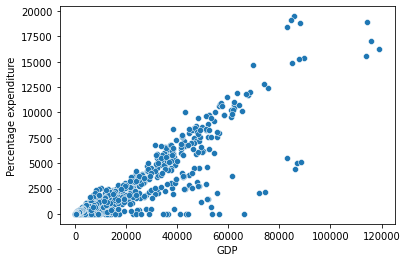

In [129]:
sns.scatterplot(data=df_life_expectancy_copy,x='GDP',y='Percentage expenditure')

In [130]:
x = df_life_expectancy_copy[df_life_expectancy_copy['GDP'].notnull()]['Percentage expenditure'].values.reshape((-1, 1))
y = df_life_expectancy_copy[df_life_expectancy_copy['GDP'].notnull()]['GDP']
test = df_life_expectancy_copy[df_life_expectancy_copy['GDP'].isnull()]['Percentage expenditure'].values.reshape((-1, 1))
y_pred = regression(x,y,test)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.8088024284235935
predicted response:
[2258.88077399 2258.88077399 2258.88077399 2258.88077399 2258.88077399
 2258.88077399 2258.88077399 2258.88077399 2258.88077399 2258.88077399
 2258.88077399 2258.88077399 2258.88077399 2258.88077399 2258.88077399
 2258.88077399 2258.88077399 2258.88077399 2258.88077399 2258.88077399
 2258.88077399 2258.88077399 2258.88077399 2258.88077399 2258.88077399
 2258.88077399 2258.88077399 2258.88077399 2258.88077399 2258.88077399
 2258.88077399 2258.88077399 2258.88077399 2258.88077399 2258.88077399
 2258.88077399 2258.88077399 2258.88077399 2258.88077399 2258.88077399
 2258.88077399 2258.88077399 2258.88077399 2258.88077399 2258.88077399
 2258.88077399 2258.88077399 2258.88077399 2258.88077399 2258.88077399
 2258.88077399 2258.88077399 2258.88077399 2258.88077399 2258.88077399
 2258.88077399 2258.88077399 2258.88077399 2258.88077399 2258.88077399
 2258.88077399 2258.88077399 2258.88077399 2258.88077399 2258.88077399
 2258.88

In [131]:
df_life_expectancy_copy.loc[df_life_expectancy_copy['GDP'].isna(), 'GDP'] = y_pred
df_life_expectancy_copy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult mortality                      0
Infant deaths                        0
Alcohol                              0
Percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
Under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                  0
Population                         612
Thinness 10-19 years                 0
Thinness 5-9 years                   0
Income composition of resources    128
Schooling                          128
dtype: int64

as we see from the heatmap we could find that Population is highly correlated with Infant deaths and Infant deaths is fully filled. so lets show there scatter

<AxesSubplot:xlabel='Population', ylabel='Infant deaths'>

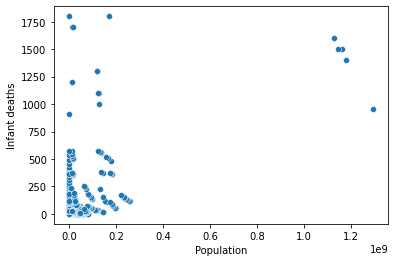

In [132]:
sns.scatterplot(data=df_life_expectancy_copy,x='Population',y='Infant deaths')

In [133]:
x = df_life_expectancy_copy[df_life_expectancy_copy['Population'].notnull()]['Infant deaths'].values.reshape((-1, 1))
y = df_life_expectancy_copy[df_life_expectancy_copy['Population'].notnull()]['Population']
test = df_life_expectancy_copy[df_life_expectancy_copy['Population'].isnull()]['Infant deaths'].values.reshape((-1, 1))
y_pred = regression(x,y,test)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.31015211126183606
predicted response:
[ 4036190.7130229   4036190.7130229   4036190.7130229   4036190.7130229
  4036190.7130229   4036190.7130229   4036190.7130229   4036190.7130229
  4036190.7130229   4036190.7130229   4036190.7130229   4036190.7130229
  4036190.7130229   4036190.7130229   4036190.7130229   4036190.7130229
  4036190.7130229   4036190.7130229   4036190.7130229   4036190.7130229
  4036190.7130229   4036190.7130229   4036190.7130229   4036190.7130229
  4036190.7130229   4036190.7130229   4036190.7130229   4036190.7130229
  4036190.7130229   4036190.7130229   4036190.7130229   4036190.7130229
  4036190.7130229   4036190.7130229   4036190.7130229   4036190.7130229
  4036190.7130229   4036190.7130229   4036190.7130229   4036190.7130229
  4036190.7130229   4036190.7130229   4036190.7130229   4036190.7130229
  4036190.7130229   4036190.7130229   4036190.7130229   4036190.7130229
  4036190.7130229   4036190.7130229   4036190.7130229   4036190.71

In [134]:
df_life_expectancy_copy.loc[df_life_expectancy_copy['Population'].isna(), 'Population'] = y_pred
df_life_expectancy_copy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult mortality                      0
Infant deaths                        0
Alcohol                              0
Percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
Under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                  0
Population                           0
Thinness 10-19 years                 0
Thinness 5-9 years                   0
Income composition of resources    128
Schooling                          128
dtype: int64

as we see from the heatmap we could find that Income composition of resources is highly correlated with Life expectancy and Life expectancy is fully filled. so lets show there scatter

<AxesSubplot:xlabel='Income composition of resources', ylabel='Life expectancy'>

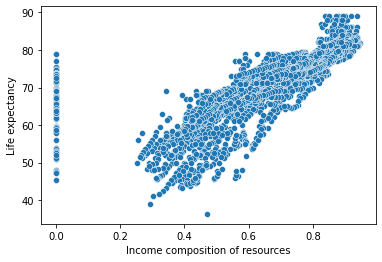

In [135]:
sns.scatterplot(data=df_life_expectancy_copy,x='Income composition of resources',y='Life expectancy')

In [136]:
x = df_life_expectancy_copy[df_life_expectancy_copy['Income composition of resources'].notnull()]['Life expectancy'].values.reshape((-1, 1))
y = df_life_expectancy_copy[df_life_expectancy_copy['Income composition of resources'].notnull()]['Income composition of resources']
test = df_life_expectancy_copy[df_life_expectancy_copy['Income composition of resources'].isnull()]['Life expectancy'].values.reshape((-1, 1))
y_pred = regression(x,y,test)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.5174435317334414
predicted response:
[0.37189616 0.36387865 0.35586114 0.35105064 0.34624014 0.34303313
 0.33501562 0.38312067 0.31737711 0.3093596  0.29813509 0.29011758
 0.28691058 0.28210007 0.28370357 0.28530707 0.78078907 0.77758207
 0.77116806 0.76796106 0.76475406 0.75994355 0.75352955 0.75192605
 0.74871904 0.74390854 0.73428753 0.73268403 0.72306302 0.72466652
 0.72145951 0.71504551 0.47612377 0.46810626 0.46008875 0.45207124
 0.44565724 0.43763973 0.42641522 0.42000121 0.4103802  0.39915569
 0.38793118 0.37510316 0.36387865 0.35265414 0.34784364 0.33982613
 0.83691163 0.83210113 0.82729062 0.81927311 0.81766961 0.91227621
 0.89624119 0.84813614 0.79682409 0.79041008 0.77918557 0.77116806
 0.76154705 0.75352955 0.74711554 0.73589103 0.67335447 0.66854396
 0.66694046 0.78399608 0.75192605 0.62043891 0.62364592 0.62204241
 0.6124214  0.6076109  0.59638639 0.6076109  0.60119689 0.59959339
 0.60119689 0.59317938 0.81927311 0.81606611 0.91227621 0.89

In [137]:
df_life_expectancy_copy.loc[df_life_expectancy_copy['Income composition of resources'].isna(), 'Income composition of resources'] = y_pred
df_life_expectancy_copy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult mortality                      0
Infant deaths                        0
Alcohol                              0
Percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
Under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                  0
Population                           0
Thinness 10-19 years                 0
Thinness 5-9 years                   0
Income composition of resources      0
Schooling                          128
dtype: int64

as we see from the heatmap we could find that Schooling is highly correlated with Life expectancy and Life expectancy is fully filled. so lets show there scatter

<AxesSubplot:xlabel='Schooling', ylabel='Life expectancy'>

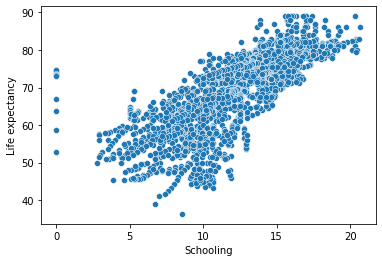

In [138]:
sns.scatterplot(data=df_life_expectancy_copy,x='Schooling',y='Life expectancy')

In [139]:
x = df_life_expectancy_copy[df_life_expectancy_copy['Schooling'].notnull()]['Life expectancy'].values.reshape((-1, 1))
y = df_life_expectancy_copy[df_life_expectancy_copy['Schooling'].notnull()]['Schooling']
test = df_life_expectancy_copy[df_life_expectancy_copy['Schooling'].isnull()]['Life expectancy'].values.reshape((-1, 1))
y_pred = regression(x,y,test)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.5620318940577897
predicted response:
[ 7.8821816   7.75206693  7.62195226  7.54388346  7.46581466  7.41376879
  7.28365412  8.06434214  6.99740184  6.86728717  6.68512663  6.55501196
  6.50296609  6.42489729  6.45092023  6.47694316 14.5180298  14.46598393
 14.3618922  14.30984633 14.25780046 14.17973166 14.07563992 14.04961699
 13.99757112 13.91950232 13.76336471 13.73734178 13.58120417 13.60722711
 13.55518124 13.4510895   9.57367232  9.44355765  9.31344298  9.18332831
  9.07923657  8.9491219   8.76696136  8.66286963  8.50673202  8.32457148
  8.14241094  7.93422747  7.75206693  7.56990639  7.49183759  7.36172292
 15.4288325  15.35076369 15.27269489 15.14258022 15.11655729 16.6519104
 16.39168106 15.61099304 14.77825914 14.67416741 14.49200687 14.3618922
 14.20575459 14.07563992 13.97154819 13.78938765 12.77449322 12.69642441
 12.67040148 14.57007567 14.04961699 11.91573639 11.96778226 11.94175932
 11.78562172 11.70755292 11.52539238 11.70755292 11.60346

In [140]:
df_life_expectancy_copy.loc[df_life_expectancy_copy['Schooling'].isna(), 'Schooling'] = y_pred
df_life_expectancy_copy.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 10-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [141]:
df_life_expectancy_clean = df_life_expectancy_copy.copy(deep=True)
df_life_expectancy_clean

Country  Year      Status  Life expectancy  Adult mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358879   

      Population  Thinness 10-19 years  Thinness 5-9 years  \
0     33736494.0                  17.2                17.3   
1       327582.0                  17.5                17.5   
2     31731688.0                  17.7                17.7   
3      3696958.0                  17.9                18.0   
4      2978599.0                  18.2                18.2   
...          ...                   ...                 ...   
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2

In [142]:
clean_data_size = df_life_expectancy_clean.shape[0]*df_life_expectancy_clean.shape[1]
clean_data_size

63008

In [143]:
print("the percentage of dropped data: "+str(((data_size-clean_data_size)/data_size)*100.0))

the percentage of dropped data: 2.518720217835262


Less than 3% that is ok. now we wil save the cleaned data

In [144]:
df_life_expectancy_clean.to_csv('data/Cleaned Life Expectancy Data.csv')

## Country Data

In [145]:
df_country_data = pd.read_csv('data/250 Country Data.csv', index_col=0)
df_country_data_copy = df_country_data.copy()
df_country_data_copy

name   region        subregion  population       area  gini  \
0          Afghanistan     Asia    Southern Asia    27657145   652230.0  27.8   
1        Åland Islands   Europe  Northern Europe       28875     1580.0   NaN   
2              Albania   Europe  Southern Europe     2886026    28748.0  34.5   
3              Algeria   Africa  Northern Africa    40400000  2381741.0  35.3   
4       American Samoa  Oceania        Polynesia       57100      199.0   NaN   
..                 ...      ...              ...         ...        ...   ...   
245  Wallis and Futuna  Oceania        Polynesia       11750      142.0   NaN   
246     Western Sahara   Africa  Northern Africa      510713   266000.0   NaN   
247              Yemen     Asia     Western Asia    27478000   527968.0  37.7   
248             Zambia   Africa   Eastern Africa    15933883   752612.0  54.6   
249           Zimbabwe   Africa   Eastern Africa    14240168   390757.0   NaN   

    Real Growth Rating(%)   Literacy Rate(%)       Inflation(%)  \
0       3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
1                     NaN                NaN                NaN   
2        .7% (2013 est.).  98.7% (2011 est.)  1.7% (2013 est.).   
3                   3.1%.                79%              3.9%.   
4                     3%.    97% (1980 est.)                NaN   
..                    ...                ...                ...   
245                   NaN                NaN                NaN   
246                   NaN                NaN                NaN   
247                 3.8%.  65.3% (2011 est.)             11.8%.   
248                   6%.  61.4% (2007 est.)              7.1%.   
249                   NaN                NaN                NaN   

                                      Unemployement(%)  
0                                     35% (2008 est.).  
1                                                  NaN  
2    16.9% official rate (2013 est.). Note: These a...  
3                                               10.3%.  
4                                                  NaN  
..                                                 ...  
245                                                NaN  
246                                                NaN  
247                                   35% (2003 est.).  
248                                   15% (2008 est.).  
249                                                NaN  

[250 rows x 10 columns]

In [146]:
#determine columns types and null counts:
df_country_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   250 non-null    object 
 1   region                 248 non-null    object 
 2   subregion              247 non-null    object 
 3   population             250 non-null    int64  
 4   area                   240 non-null    float64
 5   gini                   153 non-null    float64
 6   Real Growth Rating(%)  171 non-null    object 
 7   Literacy Rate(%)       176 non-null    object 
 8   Inflation(%)           168 non-null    object 
 9   Unemployement(%)       168 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 14.6+ KB


In [147]:
#summation of nan or null in each column:
df_country_data_copy.isnull().sum()

name                      0
region                    2
subregion                 3
population                0
area                     10
gini                     97
Real Growth Rating(%)    79
Literacy Rate(%)         74
Inflation(%)             82
Unemployement(%)         82
dtype: int64

In [148]:
tempdf = df_country_data_copy['Real Growth Rating(%)'].value_counts()    #count of each unique value in "Real Growth Rating(%)" col
print(tempdf['n.a.'])    ##number of occurences of 'n.a.' (expected after editing 6+79=85)
df_country_data_copy['Real Growth Rating(%)'].unique()   #notice "nan" and "n.a." need to be unified

6


array(['3.1% (2013 est.).', nan, '.7% (2013 est.).', '3.1%.', '3%.',
       '-1.6%.', '5.6%.', '2.8%.', '1.7% (2012 est.).', '3.5%.', '2.4%.',
       '2.5%.', '0.4%.', '5.8%.', '1.9%.', '–0.8%.', '2.1%.', '0.1%.',
       '5%.', '4.6%.', '3.9%.', '–2.7%.', '0.5%.', '6.5%.', '4.5%.',
       '7%.', '1.7% (2002 est.).', '-14.5%.', '6.2%.', '–1%.', '–8.70%.',
       '–0.9%.', '1.1%.', '2%.', '45%.', '1.8%.', '1.6%.', '–1.5%.',
       '1.5%.', '2.9% (2010 est.).', '–.2%.', '-4.2% (2009).', '5.1%.',
       '7.9%.', '6% (2008)', '–3.8%.', '0.8%.', 'n.a.', '5.3%.', '3.4%.',
       '3.2%.', '5.35%.', '4.2%.', '0.6%.', '3.3%.', '-1.8%.', '2.9%.',
       '8.2%.', '7.4%.', '4%.', '4.1%.', '8.1%.', '-5.1%.',
       '1.8% (2012).', '2.6%.', '4.3%.', '4.7%.', '4.8%.', '2.3%.',
       '6.4%.', '1.25%.', '0.9%.', '11.8%.', '6.8%.', '3.6%.', '-0.8%.',
       '7.5%.', '5.4%.', '12%.', '1.3%.', '-5.8%.', '5.5%.',
       '0.1% (2013 est).', '-3.5%.', '13.3%.', '-1.1%.', '-1.3%.',
       '6.3%.', '2.2%.', '7

Remove est...., string, and '%' in 'Real Growth Rating(%)' column

In [149]:
#consider only integer or float values in "Real Growth Rating(%)" col (remove strings and '%' since it is in the col name):
df_country_data_copy['Real Growth Rating(%)'] = df_country_data_copy['Real Growth Rating(%)'].str.extract('((?:|[-+*/])-?\d+(?:\.\d+)?)',expand=False).astype(float)  #the regex value refers to only integers or floats either with nothing preceeding or with '-' (-ve value) preceeding.
df_country_data_copy

name   region        subregion  population       area  gini  \
0          Afghanistan     Asia    Southern Asia    27657145   652230.0  27.8   
1        Åland Islands   Europe  Northern Europe       28875     1580.0   NaN   
2              Albania   Europe  Southern Europe     2886026    28748.0  34.5   
3              Algeria   Africa  Northern Africa    40400000  2381741.0  35.3   
4       American Samoa  Oceania        Polynesia       57100      199.0   NaN   
..                 ...      ...              ...         ...        ...   ...   
245  Wallis and Futuna  Oceania        Polynesia       11750      142.0   NaN   
246     Western Sahara   Africa  Northern Africa      510713   266000.0   NaN   
247              Yemen     Asia     Western Asia    27478000   527968.0  37.7   
248             Zambia   Africa   Eastern Africa    15933883   752612.0  54.6   
249           Zimbabwe   Africa   Eastern Africa    14240168   390757.0   NaN   

     Real Growth Rating(%)   Literacy Rate(%)       Inflation(%)  \
0                      3.1  28.1% (2000 est.)  6.8% (2013 est.).   
1                      NaN                NaN                NaN   
2                      7.0  98.7% (2011 est.)  1.7% (2013 est.).   
3                      3.1                79%              3.9%.   
4                      3.0    97% (1980 est.)                NaN   
..                     ...                ...                ...   
245                    NaN                NaN                NaN   
246                    NaN                NaN                NaN   
247                    3.8  65.3% (2011 est.)             11.8%.   
248                    6.0  61.4% (2007 est.)              7.1%.   
249                    NaN                NaN                NaN   

                                      Unemployement(%)  
0                                     35% (2008 est.).  
1                                                  NaN  
2    16.9% official rate (2013 est.). Note: These a...  
3                                               10.3%.  
4                                                  NaN  
..                                                 ...  
245                                                NaN  
246                                                NaN  
247                                   35% (2003 est.).  
248                                   15% (2008 est.).  
249                                                NaN  

[250 rows x 10 columns]

In [150]:
#check the null values of the col "Real Growth Rating(%)":
df_country_data_copy.isnull().sum() #notice that "Real Growth Rating(%)" became 85 which was expected

name                      0
region                    2
subregion                 3
population                0
area                     10
gini                     97
Real Growth Rating(%)    85
Literacy Rate(%)         74
Inflation(%)             82
Unemployement(%)         82
dtype: int64

Do the same for the rest of messed columns (Literacy Rate(%), Inflation(%), Unemployement(%))

In [151]:
print(df_country_data_copy['Literacy Rate(%)'].value_counts())
print(df_country_data_copy['Inflation(%)'].value_counts())
print(df_country_data_copy['Unemployement(%)'].value_counts())

99% (2003 est.)      9
99% (2011 est.)      5
100%                 4
99.7% (2011 est.)    4
98% (1970 est.)      3
                    ..
93.9% (2010 est.)    1
60.8% (2010 est.)    1
87.4% (2010 est.)    1
98%                  1
64.5% (2009 est.)    1
Name: Literacy Rate(%), Length: 151, dtype: int64
2.2%.                 5
1.3%.                 5
3.9%.                 4
2.4%.                 4
2.5%.                 3
                     ..
6.2%.                 1
8.7%.                 1
-2.7% (2012 est.).    1
8.3%.                 1
8.2%.                 1
Name: Inflation(%), Length: 115, dtype: int64
n.a.                  17
4.5%.                  3
6%.                    3
8.3%.                  2
12.4%.                 2
                      ..
9%.                    1
11.4% (2011 est.).     1
8.6% (2011 est.).      1
4.2%                   1
25% (2008).            1
Name: Unemployement(%), Length: 141, dtype: int64


In [152]:
#consider only integer or float values in "Literacy Rate(%)" col (remove strings and '%' since it is in the col name):
df_country_data_copy['Literacy Rate(%)'] = df_country_data_copy['Literacy Rate(%)'].str.extract('((?:|[-+*/])-?\d+(?:\.\d+)?)',expand=False).astype(float)
df_country_data_copy['Inflation(%)'] = df_country_data_copy['Inflation(%)'].str.extract('((?:|[-+*/])-?\d+(?:\.\d+)?)',expand=False).astype(float)
df_country_data_copy['Unemployement(%)'] = df_country_data_copy['Unemployement(%)'].str.extract('((?:|[-+*/])-?\d+(?:\.\d+)?)',expand=False).astype(float)
df_country_data_copy

name   region        subregion  population       area  gini  \
0          Afghanistan     Asia    Southern Asia    27657145   652230.0  27.8   
1        Åland Islands   Europe  Northern Europe       28875     1580.0   NaN   
2              Albania   Europe  Southern Europe     2886026    28748.0  34.5   
3              Algeria   Africa  Northern Africa    40400000  2381741.0  35.3   
4       American Samoa  Oceania        Polynesia       57100      199.0   NaN   
..                 ...      ...              ...         ...        ...   ...   
245  Wallis and Futuna  Oceania        Polynesia       11750      142.0   NaN   
246     Western Sahara   Africa  Northern Africa      510713   266000.0   NaN   
247              Yemen     Asia     Western Asia    27478000   527968.0  37.7   
248             Zambia   Africa   Eastern Africa    15933883   752612.0  54.6   
249           Zimbabwe   Africa   Eastern Africa    14240168   390757.0   NaN   

     Real Growth Rating(%)  Literacy Rate(%)  Inflation(%)  Unemployement(%)  
0                      3.1              28.1           6.8              35.0  
1                      NaN               NaN           NaN               NaN  
2                      7.0              98.7           1.7              16.9  
3                      3.1              79.0           3.9              10.3  
4                      3.0              97.0           NaN               NaN  
..                     ...               ...           ...               ...  
245                    NaN               NaN           NaN               NaN  
246                    NaN               NaN           NaN               NaN  
247                    3.8              65.3          11.8              35.0  
248                    6.0              61.4           7.1              15.0  
249                    NaN               NaN           NaN               NaN  

[250 rows x 10 columns]

In [153]:
print(df_country_data_copy['Literacy Rate(%)'].value_counts(), df_country_data_copy['Inflation(%)'].value_counts())
print(df_country_data_copy['Unemployement(%)'].value_counts())

99.0     19
99.7      7
98.0      7
100.0     6
94.2      3
         ..
97.9      1
93.9      1
84.1      1
37.8      1
79.0      1
Name: Literacy Rate(%), Length: 114, dtype: int64  2.8     5
 3.9     5
 1.3     5
 2.2     5
 2.4     4
        ..
 8.3     1
 8.9     1
 0.1     1
-0.8     1
 15.2    1
Name: Inflation(%), Length: 90, dtype: int64
6.00     5
30.00    4
4.10     4
4.50     3
2.00     3
        ..
9.90     1
5.90     1
6.43     1
5.20     1
17.40    1
Name: Unemployement(%), Length: 113, dtype: int64


In [154]:
df_country_data_copy

name   region        subregion  population       area  gini  \
0          Afghanistan     Asia    Southern Asia    27657145   652230.0  27.8   
1        Åland Islands   Europe  Northern Europe       28875     1580.0   NaN   
2              Albania   Europe  Southern Europe     2886026    28748.0  34.5   
3              Algeria   Africa  Northern Africa    40400000  2381741.0  35.3   
4       American Samoa  Oceania        Polynesia       57100      199.0   NaN   
..                 ...      ...              ...         ...        ...   ...   
245  Wallis and Futuna  Oceania        Polynesia       11750      142.0   NaN   
246     Western Sahara   Africa  Northern Africa      510713   266000.0   NaN   
247              Yemen     Asia     Western Asia    27478000   527968.0  37.7   
248             Zambia   Africa   Eastern Africa    15933883   752612.0  54.6   
249           Zimbabwe   Africa   Eastern Africa    14240168   390757.0   NaN   

     Real Growth Rating(%)  Literacy Rate(%)  Inflation(%)  Unemployement(%)  
0                      3.1              28.1           6.8              35.0  
1                      NaN               NaN           NaN               NaN  
2                      7.0              98.7           1.7              16.9  
3                      3.1              79.0           3.9              10.3  
4                      3.0              97.0           NaN               NaN  
..                     ...               ...           ...               ...  
245                    NaN               NaN           NaN               NaN  
246                    NaN               NaN           NaN               NaN  
247                    3.8              65.3          11.8              35.0  
248                    6.0              61.4           7.1              15.0  
249                    NaN               NaN           NaN               NaN  

[250 rows x 10 columns]

Now let's get the percentages of values to get the "nan" percentages in columns


In [155]:
df_country_data_copy.gini.value_counts(dropna=False,normalize=True)*100

NaN     38.8
30.9     1.2
30.0     1.2
26.0     1.2
33.7     1.2
        ... 
44.8     0.4
50.7     0.4
28.2     0.4
37.9     0.4
26.9     0.4
Name: gini, Length: 115, dtype: float64

The percentage of nulls is 38.8

In [156]:
df_country_data_copy.gini.value_counts().sort_index(ascending=False)

65.8    1
64.3    1
63.9    1
63.1    1
61.0    1
       ..
26.4    1
26.0    3
25.8    1
25.0    1
24.0    1
Name: gini, Length: 114, dtype: int64

The maximum value is 65.8 and the mimimum is 24. The frequentist values are between 26 to 33.7 which are slightly below the mean average

The rows that have null values for all the 5 main columns "gini, Real Growth Rating(%), Literacy Rate(%), Inflation(%), Unemployement(%)"

In [157]:
df_null_rows = df_country_data_copy[((df_country_data_copy["gini"].isnull()) & (df_country_data_copy["Real Growth Rating(%)"].isnull()) & (df_country_data_copy["Literacy Rate(%)"].isnull()) & (df_country_data_copy["Inflation(%)"].isnull()) & (df_country_data_copy["Unemployement(%)"].isnull()))]
print(df_null_rows.shape)
#df_null_rows

(43, 10)


The percentage is (43/250)*100= 17.2% 

In [158]:
df_country_data_copy

name   region        subregion  population       area  gini  \
0          Afghanistan     Asia    Southern Asia    27657145   652230.0  27.8   
1        Åland Islands   Europe  Northern Europe       28875     1580.0   NaN   
2              Albania   Europe  Southern Europe     2886026    28748.0  34.5   
3              Algeria   Africa  Northern Africa    40400000  2381741.0  35.3   
4       American Samoa  Oceania        Polynesia       57100      199.0   NaN   
..                 ...      ...              ...         ...        ...   ...   
245  Wallis and Futuna  Oceania        Polynesia       11750      142.0   NaN   
246     Western Sahara   Africa  Northern Africa      510713   266000.0   NaN   
247              Yemen     Asia     Western Asia    27478000   527968.0  37.7   
248             Zambia   Africa   Eastern Africa    15933883   752612.0  54.6   
249           Zimbabwe   Africa   Eastern Africa    14240168   390757.0   NaN   

     Real Growth Rating(%)  Literacy Rate(%)  Inflation(%)  Unemployement(%)  
0                      3.1              28.1           6.8              35.0  
1                      NaN               NaN           NaN               NaN  
2                      7.0              98.7           1.7              16.9  
3                      3.1              79.0           3.9              10.3  
4                      3.0              97.0           NaN               NaN  
..                     ...               ...           ...               ...  
245                    NaN               NaN           NaN               NaN  
246                    NaN               NaN           NaN               NaN  
247                    3.8              65.3          11.8              35.0  
248                    6.0              61.4           7.1              15.0  
249                    NaN               NaN           NaN               NaN  

[250 rows x 10 columns]

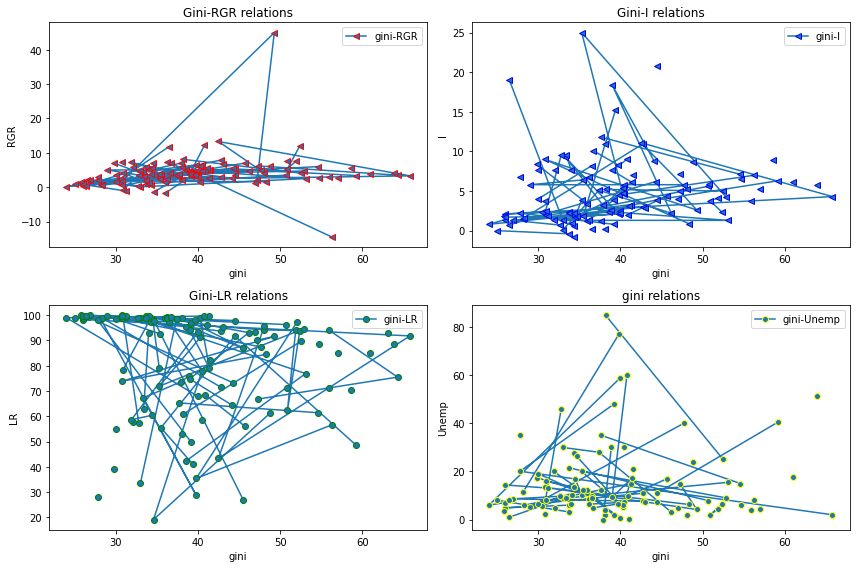

In [159]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs[0, 0].plot(df_country_data_copy["gini"],df_country_data_copy['Real Growth Rating(%)'],label="gini-RGR",marker='<',markeredgecolor='red')
#plt.plot(df_country_data_copy["gini"],df_country_data_copy['Literacy Rate(%)'],label="gini-LR",marker='o',markeredgecolor='green')
axs[0, 0].set(xlabel='gini', ylabel='RGR')
axs[0, 0].set_title('Gini-RGR relations')
axs[0, 0].legend(loc=1)
#########################
axs[1, 0].plot(df_country_data_copy["gini"],df_country_data_copy['Literacy Rate(%)'],label="gini-LR",marker='o',markeredgecolor='green')
axs[1, 0].set(xlabel='gini', ylabel='LR')
axs[1, 0].set_title('Gini-LR relations')
axs[1, 0].legend(loc=1)
#########################
axs[0, 1].plot(df_country_data_copy["gini"],df_country_data_copy['Inflation(%)'],label="gini-I",marker='<',markeredgecolor='blue')
axs[0, 1].set(xlabel='gini', ylabel='I')
axs[0, 1].set_title('Gini-I relations')
axs[0, 1].legend(loc=1)
#########################
axs[1, 1].plot(df_country_data_copy["gini"],df_country_data_copy['Unemployement(%)'],label="gini-Unemp",marker='o',markeredgecolor='yellow')
axs[1, 1].set(xlabel='gini', ylabel='Unemp')
axs[1, 1].set_title('Gini-Unemp relations')
axs[1, 1].legend(loc=1)
#########################
plt.title('gini relations')
fig.tight_layout()


It can be noticed that gini has some kind of relation with "real growth rate" and no relations with the rest 3 columns.

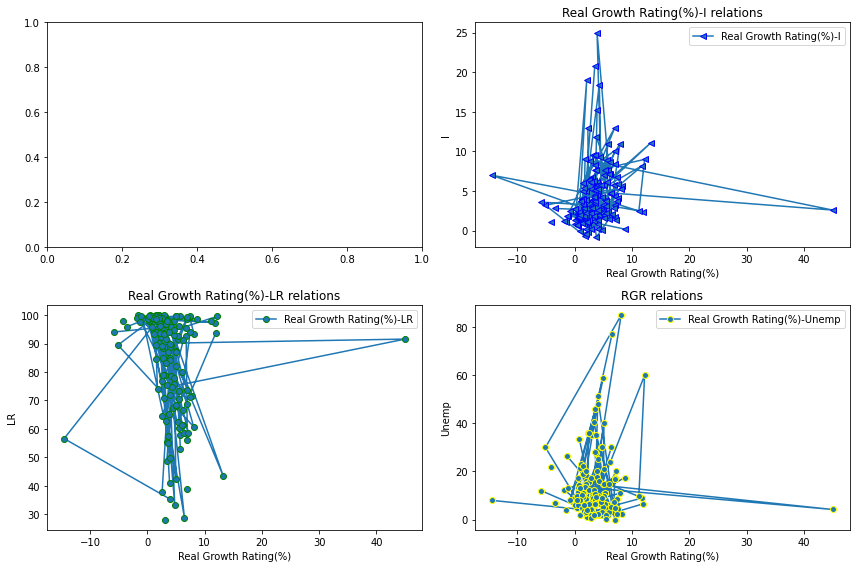

In [160]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))

#########################
axs[1, 0].plot(df_country_data_copy["Real Growth Rating(%)"],df_country_data_copy['Literacy Rate(%)'],label="Real Growth Rating(%)-LR",marker='o',markeredgecolor='green')
axs[1, 0].set(xlabel='Real Growth Rating(%)', ylabel='LR')
axs[1, 0].set_title('Real Growth Rating(%)-LR relations')
axs[1, 0].legend(loc=1)
#########################
axs[0, 1].plot(df_country_data_copy["Real Growth Rating(%)"],df_country_data_copy['Inflation(%)'],label="Real Growth Rating(%)-I",marker='<',markeredgecolor='blue')
axs[0, 1].set(xlabel='Real Growth Rating(%)', ylabel='I')
axs[0, 1].set_title('Real Growth Rating(%)-I relations')
axs[0, 1].legend(loc=1)
#########################
axs[1, 1].plot(df_country_data_copy["Real Growth Rating(%)"],df_country_data_copy['Unemployement(%)'],label="Real Growth Rating(%)-Unemp",marker='o',markeredgecolor='yellow')
axs[1, 1].set(xlabel='Real Growth Rating(%)', ylabel='Unemp')
axs[1, 1].set_title('Real Growth Rating(%)-Unemp relations')
axs[1, 1].legend(loc=1)
#########################
plt.title('RGR relations')
fig.tight_layout()


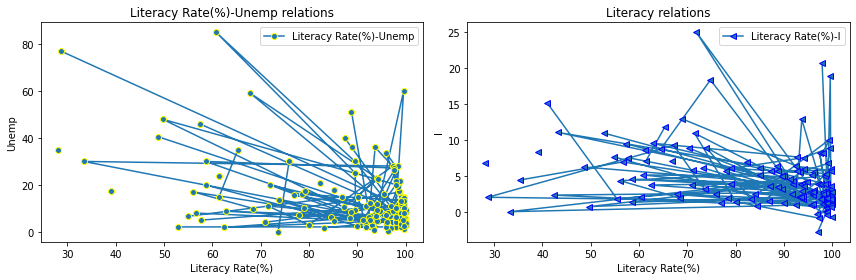

In [161]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), squeeze=False)
#########################
axs[0, 0].plot(df_country_data_copy["Literacy Rate(%)"],df_country_data_copy['Unemployement(%)'],label="Literacy Rate(%)-Unemp",marker='o',markeredgecolor='yellow')
axs[0, 0].set(xlabel='Literacy Rate(%)', ylabel='Unemp')
axs[0, 0].set_title('Literacy Rate(%)-Unemp relations')
axs[0, 0].legend(loc=1)
#########################
axs[0, 1].plot(df_country_data_copy["Literacy Rate(%)"],df_country_data_copy['Inflation(%)'],label="Literacy Rate(%)-I",marker='<',markeredgecolor='blue')
axs[0, 1].set(xlabel='Literacy Rate(%)', ylabel='I')
axs[0, 1].set_title('Literacy Rate(%)-I relations')
axs[0, 1].legend(loc=1)
#########################
plt.title('Literacy relations')
fig.tight_layout()


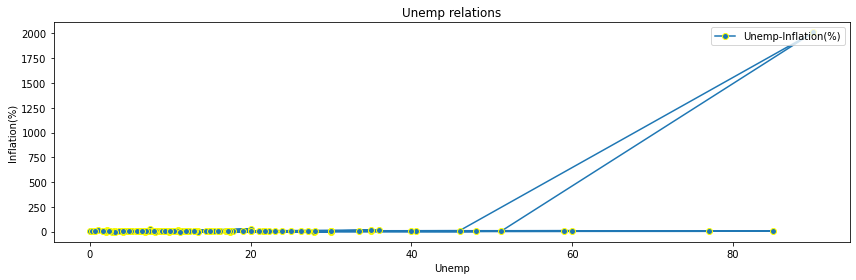

In [162]:
#import numpy as np
fig, axs = plt.subplots(1, 1, figsize=(12,4), squeeze=False)
#########################
axs[0, 0].plot(df_country_data_copy["Unemployement(%)"],df_country_data_copy['Inflation(%)'],label="Unemp-Inflation(%)",marker='o',markeredgecolor='yellow')
#axs[0, 0].set_yticks(np.arange(0, 25, 5))
axs[0, 0].set(xlabel='Unemp', ylabel='Inflation(%)')
axs[0, 0].set_title('Unemp-Inflation(%) relations')
axs[0, 0].legend(loc=1)
#########################
plt.title('Unemp relations')
fig.tight_layout()


There is no obvious relation between any of the columns to deduce the missing values of a column from another one.

In [163]:
#Real Growth Rating(%)	Literacy Rate(%)	Inflation(%)	Unemployement(%)
df_percentage = df_country_data_copy["Real Growth Rating(%)"].value_counts(dropna=False,normalize=True)*100
df_percentage
#df_percentage[df_percentage.index==0]

 NaN     34.0
 3.50     3.2
 7.00     2.4
 2.50     2.0
 4.00     2.0
         ... 
-1.30     0.4
 8.70     0.4
 2.20     0.4
-1.60     0.4
 5.35     0.4
Name: Real Growth Rating(%), Length: 81, dtype: float64

In [164]:
df_percentage = df_country_data_copy["Inflation(%)"].value_counts(dropna=False,normalize=True)*100
print(df_percentage)
df_percentage = df_country_data_copy["Literacy Rate(%)"].value_counts(dropna=False,normalize=True)*100
print(df_percentage)
df_percentage = df_country_data_copy["Unemployement(%)"].value_counts(dropna=False,normalize=True)*100
print(df_percentage)

 NaN     34.4
 1.3      2.0
 3.9      2.0
 2.8      2.0
 2.2      2.0
         ... 
 4.4      0.4
-0.4      0.4
-0.2      0.4
 3.6      0.4
 15.2     0.4
Name: Inflation(%), Length: 91, dtype: float64
NaN      30.8
99.0      7.6
99.7      2.8
98.0      2.8
100.0     2.4
         ... 
97.9      0.4
93.9      0.4
84.1      0.4
37.8      0.4
91.6      0.4
Name: Literacy Rate(%), Length: 115, dtype: float64
NaN     40.0
6.0      2.0
4.1      1.6
30.0     1.6
6.6      1.2
        ... 
27.9     0.4
51.2     0.4
9.2      0.4
5.3      0.4
22.3     0.4
Name: Unemployement(%), Length: 114, dtype: float64


In [165]:
df_country_data_copy

name   region        subregion  population       area  gini  \
0          Afghanistan     Asia    Southern Asia    27657145   652230.0  27.8   
1        Åland Islands   Europe  Northern Europe       28875     1580.0   NaN   
2              Albania   Europe  Southern Europe     2886026    28748.0  34.5   
3              Algeria   Africa  Northern Africa    40400000  2381741.0  35.3   
4       American Samoa  Oceania        Polynesia       57100      199.0   NaN   
..                 ...      ...              ...         ...        ...   ...   
245  Wallis and Futuna  Oceania        Polynesia       11750      142.0   NaN   
246     Western Sahara   Africa  Northern Africa      510713   266000.0   NaN   
247              Yemen     Asia     Western Asia    27478000   527968.0  37.7   
248             Zambia   Africa   Eastern Africa    15933883   752612.0  54.6   
249           Zimbabwe   Africa   Eastern Africa    14240168   390757.0   NaN   

     Real Growth Rating(%)  Literacy Rate(%)  Inflation(%)  Unemployement(%)  
0                      3.1              28.1           6.8              35.0  
1                      NaN               NaN           NaN               NaN  
2                      7.0              98.7           1.7              16.9  
3                      3.1              79.0           3.9              10.3  
4                      3.0              97.0           NaN               NaN  
..                     ...               ...           ...               ...  
245                    NaN               NaN           NaN               NaN  
246                    NaN               NaN           NaN               NaN  
247                    3.8              65.3          11.8              35.0  
248                    6.0              61.4           7.1              15.0  
249                    NaN               NaN           NaN               NaN  

[250 rows x 10 columns]

Since "gini" means the distribution of income across population then countries of close region tend to be similar

In [166]:
df_country_data_nulls_gini = df_country_data_copy[df_country_data_copy['gini'].isnull()]
#get the gini values of countries lie in the same subregion of each country has a null value in gini
for index, null_row in df_country_data_nulls_gini.iterrows():
#    df_country_data_close_population = df_country_data_copy[((df_country_data_copy['gini'].notnull()) & (df_country_data_copy['population'] >= null_row.population) & (df_country_data_copy['population'] <= 2 * (null_row.population)))]
    df_country_data_close_subregion = df_country_data_copy[((df_country_data_copy['subregion'] == null_row.subregion) & (df_country_data_copy['gini'].notnull()))]
    if len(df_country_data_close_subregion['gini']) > 0:
        df_country_data_nulls_gini.loc[index,'gini'] = df_country_data_close_subregion['gini'].mean()
df_country_data_copy.loc[df_country_data_nulls_gini.index, 'gini'] = df_country_data_nulls_gini[:]
df_country_data_copy

c:\users\innovator\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


name   region        subregion  population       area  \
0          Afghanistan     Asia    Southern Asia    27657145   652230.0   
1        Åland Islands   Europe  Northern Europe       28875     1580.0   
2              Albania   Europe  Southern Europe     2886026    28748.0   
3              Algeria   Africa  Northern Africa    40400000  2381741.0   
4       American Samoa  Oceania        Polynesia       57100      199.0   
..                 ...      ...              ...         ...        ...   
245  Wallis and Futuna  Oceania        Polynesia       11750      142.0   
246     Western Sahara   Africa  Northern Africa      510713   266000.0   
247              Yemen     Asia     Western Asia    27478000   527968.0   
248             Zambia   Africa   Eastern Africa    15933883   752612.0   
249           Zimbabwe   Africa   Eastern Africa    14240168   390757.0   

          gini  Real Growth Rating(%)  Literacy Rate(%)  Inflation(%)  \
0    27.800000                    3.1              28.1           6.8   
1    31.133333                    NaN               NaN           NaN   
2    34.500000                    7.0              98.7           1.7   
3    35.300000                    3.1              79.0           3.9   
4          NaN                    3.0              97.0           NaN   
..         ...                    ...               ...           ...   
245        NaN                    NaN               NaN           NaN   
246  36.740000                    NaN               NaN           NaN   
247  37.700000                    3.8              65.3          11.8   
248  54.600000                    6.0              61.4           7.1   
249  45.923077                    NaN               NaN           NaN   

     Unemployement(%)  
0                35.0  
1                 NaN  
2                16.9  
3                10.3  
4                 NaN  
..                ...  
245               NaN  
246               NaN  
247              35.0  
248              15.0  
249               NaN  

[250 rows x 10 columns]

In [167]:
df_country_data_copy.isnull().sum()

name                       0
region                     2
subregion                  3
population                 0
area                      10
gini                      20
Real Growth Rating(%)     85
Literacy Rate(%)          77
Inflation(%)              86
Unemployement(%)         100
dtype: int64

The 'gini' null values are 20 only now, they can be filled with zeros

In [168]:
df_country_data_copy['gini'].fillna(0, inplace=True)
df_country_data_copy.gini = df_country_data_copy.gini.round(1)

In [169]:
df_country_data_copy.isnull().sum()

name                       0
region                     2
subregion                  3
population                 0
area                      10
gini                       0
Real Growth Rating(%)     85
Literacy Rate(%)          77
Inflation(%)              86
Unemployement(%)         100
dtype: int64

Applying the same approach for getting the missing data of Literacy Rate and Real Growth Rating

In [170]:
df_country_data_nulls_literacy = df_country_data_copy[df_country_data_copy['Literacy Rate(%)'].isnull()]
for index, null_row in df_country_data_nulls_literacy.iterrows():
    df_country_data_close_subregion = df_country_data_copy[((df_country_data_copy['subregion'] == null_row.subregion) & (df_country_data_copy['Literacy Rate(%)'].notnull()))]
    if len(df_country_data_close_subregion['Literacy Rate(%)']) > 0:
        df_country_data_nulls_literacy.loc[index,'Literacy Rate(%)'] = df_country_data_close_subregion['Literacy Rate(%)'].mean()
df_country_data_copy.loc[df_country_data_nulls_literacy.index, 'Literacy Rate(%)'] = df_country_data_nulls_literacy[:]
print(df_country_data_copy.isnull().sum())
df_country_data_copy['Literacy Rate(%)'] = df_country_data_copy['Literacy Rate(%)'].round(1)
df_country_data_copy

name                       0
region                     2
subregion                  3
population                 0
area                      10
gini                       0
Real Growth Rating(%)     85
Literacy Rate(%)           3
Inflation(%)              86
Unemployement(%)         100
dtype: int64


c:\users\innovator\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


name   region        subregion  population       area  gini  \
0          Afghanistan     Asia    Southern Asia    27657145   652230.0  27.8   
1        Åland Islands   Europe  Northern Europe       28875     1580.0  31.1   
2              Albania   Europe  Southern Europe     2886026    28748.0  34.5   
3              Algeria   Africa  Northern Africa    40400000  2381741.0  35.3   
4       American Samoa  Oceania        Polynesia       57100      199.0   0.0   
..                 ...      ...              ...         ...        ...   ...   
245  Wallis and Futuna  Oceania        Polynesia       11750      142.0   0.0   
246     Western Sahara   Africa  Northern Africa      510713   266000.0  36.7   
247              Yemen     Asia     Western Asia    27478000   527968.0  37.7   
248             Zambia   Africa   Eastern Africa    15933883   752612.0  54.6   
249           Zimbabwe   Africa   Eastern Africa    14240168   390757.0  45.9   

     Real Growth Rating(%)  Literacy Rate(%)  Inflation(%)  Unemployement(%)  
0                      3.1              28.1           6.8              35.0  
1                      NaN              99.3           NaN               NaN  
2                      7.0              98.7           1.7              16.9  
3                      3.1              79.0           3.9              10.3  
4                      3.0              97.0           NaN               NaN  
..                     ...               ...           ...               ...  
245                    NaN              98.2           NaN               NaN  
246                    NaN              77.0           NaN               NaN  
247                    3.8              65.3          11.8              35.0  
248                    6.0              61.4           7.1              15.0  
249                    NaN              69.6           NaN               NaN  

[250 rows x 10 columns]

In [171]:
#show the literacy null rows
df_country_data_copy[df_country_data_copy['Literacy Rate(%)'].isnull()] #notice that the subregion and region columns are nulls (these rows will be dropped in a further step due to the huge null values it holds in columns)

name region subregion  population  \
8                          Antarctica  Polar       NaN        1000   
30                      Bouvet Island    NaN       NaN           0   
98  Heard Island and McDonald Islands    NaN       NaN           0   

          area  gini  Real Growth Rating(%)  Literacy Rate(%)  Inflation(%)  \
8   14000000.0   0.0                    NaN               NaN           NaN   
30        49.0   0.0                    NaN               NaN           NaN   
98       412.0   0.0                    NaN               NaN           NaN   

    Unemployement(%)  
8                NaN  
30               NaN  
98               NaN

In [172]:
df_country_data_nulls_RGR = df_country_data_copy[df_country_data_copy['Real Growth Rating(%)'].isnull()]
for index, null_row in df_country_data_nulls_RGR.iterrows():
    df_country_data_close_subregion = df_country_data_copy[((df_country_data_copy['subregion'] == null_row.subregion) & (df_country_data_copy['Real Growth Rating(%)'].notnull()))]
    if len(df_country_data_close_subregion['Real Growth Rating(%)']) > 0:
        df_country_data_nulls_RGR.loc[index,'Real Growth Rating(%)'] = df_country_data_close_subregion['Real Growth Rating(%)'].mean()
df_country_data_copy.loc[df_country_data_nulls_RGR.index, 'Real Growth Rating(%)'] = df_country_data_nulls_RGR[:]
print(df_country_data_copy.isnull().sum())
df_country_data_copy['Real Growth Rating(%)'] = df_country_data_copy['Real Growth Rating(%)'].round(1)
df_country_data_copy

name                       0
region                     2
subregion                  3
population                 0
area                      10
gini                       0
Real Growth Rating(%)      3
Literacy Rate(%)           3
Inflation(%)              86
Unemployement(%)         100
dtype: int64


c:\users\innovator\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


name   region        subregion  population       area  gini  \
0          Afghanistan     Asia    Southern Asia    27657145   652230.0  27.8   
1        Åland Islands   Europe  Northern Europe       28875     1580.0  31.1   
2              Albania   Europe  Southern Europe     2886026    28748.0  34.5   
3              Algeria   Africa  Northern Africa    40400000  2381741.0  35.3   
4       American Samoa  Oceania        Polynesia       57100      199.0   0.0   
..                 ...      ...              ...         ...        ...   ...   
245  Wallis and Futuna  Oceania        Polynesia       11750      142.0   0.0   
246     Western Sahara   Africa  Northern Africa      510713   266000.0  36.7   
247              Yemen     Asia     Western Asia    27478000   527968.0  37.7   
248             Zambia   Africa   Eastern Africa    15933883   752612.0  54.6   
249           Zimbabwe   Africa   Eastern Africa    14240168   390757.0  45.9   

     Real Growth Rating(%)  Literacy Rate(%)  Inflation(%)  Unemployement(%)  
0                      3.1              28.1           6.8              35.0  
1                      1.9              99.3           NaN               NaN  
2                      7.0              98.7           1.7              16.9  
3                      3.1              79.0           3.9              10.3  
4                      3.0              97.0           NaN               NaN  
..                     ...               ...           ...               ...  
245                    0.2              98.2           NaN               NaN  
246                    1.9              77.0           NaN               NaN  
247                    3.8              65.3          11.8              35.0  
248                    6.0              61.4           7.1              15.0  
249                    4.8              69.6           NaN               NaN  

[250 rows x 10 columns]

In [173]:
df_country_data_copy.dropna(subset = ["subregion"], inplace=True)

In [174]:
df_country_data_copy.isnull().sum()

name                      0
region                    0
subregion                 0
population                0
area                     10
gini                      0
Real Growth Rating(%)     0
Literacy Rate(%)          0
Inflation(%)             83
Unemployement(%)         97
dtype: int64

since unemployment is 40%, and Real Growth Rate is calculated by Inflation in its rule (by googling Growth rate rule). Then we can drop both columns.

In [175]:
df_country_data_copy.drop(['Unemployement(%)', 'Inflation(%)'], inplace=True, axis=1)
df_country_data_copy.isnull().sum()

name                      0
region                    0
subregion                 0
population                0
area                     10
gini                      0
Real Growth Rating(%)     0
Literacy Rate(%)          0
dtype: int64

In [176]:
df_country_data_copy

name   region        subregion  population       area  gini  \
0          Afghanistan     Asia    Southern Asia    27657145   652230.0  27.8   
1        Åland Islands   Europe  Northern Europe       28875     1580.0  31.1   
2              Albania   Europe  Southern Europe     2886026    28748.0  34.5   
3              Algeria   Africa  Northern Africa    40400000  2381741.0  35.3   
4       American Samoa  Oceania        Polynesia       57100      199.0   0.0   
..                 ...      ...              ...         ...        ...   ...   
245  Wallis and Futuna  Oceania        Polynesia       11750      142.0   0.0   
246     Western Sahara   Africa  Northern Africa      510713   266000.0  36.7   
247              Yemen     Asia     Western Asia    27478000   527968.0  37.7   
248             Zambia   Africa   Eastern Africa    15933883   752612.0  54.6   
249           Zimbabwe   Africa   Eastern Africa    14240168   390757.0  45.9   

     Real Growth Rating(%)  Literacy Rate(%)  
0                      3.1              28.1  
1                      1.9              99.3  
2                      7.0              98.7  
3                      3.1              79.0  
4                      3.0              97.0  
..                     ...               ...  
245                    0.2              98.2  
246                    1.9              77.0  
247                    3.8              65.3  
248                    6.0              61.4  
249                    4.8              69.6  

[247 rows x 8 columns]

Since the area is somehow related to population (population increase by area and vice versa), we could use regression to predic the missing values of area using the population column

In [177]:
x = df_country_data_copy[df_country_data_copy['area'].notnull()]['population'].values.reshape((-1, 1))
y = df_country_data_copy[df_country_data_copy['area'].notnull()]['area']
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
test = df_country_data_copy[df_country_data_copy['area'].isnull()]['population'].values.reshape((-1, 1))
y_pred = model.predict(test)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.21250480610354483
predicted response:
[378490.70607957 380103.90232504 381027.69846561 380888.80956642
 379928.61132368 408199.73894621 383824.90528608 378515.80113171
 378488.99289017 378505.05879966]


The y_pred value is too small for accuracy to replace the null value with these predicted values, let's configure the null rows first and how they look.

In [178]:
df_country_data_copy[df_country_data_copy['area'].isnull()]

name    region         subregion  \
33           United States Minor Outlying Islands  Americas  Northern America   
78                                  French Guiana  Americas     South America   
90                                     Guadeloupe  Americas         Caribbean   
140                                    Martinique  Americas         Caribbean   
143                                       Mayotte    Africa    Eastern Africa   
171                           Palestine, State of      Asia      Western Asia   
183                                       Réunion    Africa    Eastern Africa   
188  Saint Helena, Ascension and Tristan da Cunha    Africa    Western Africa   
209  South Georgia and the South Sandwich Islands  Americas     South America   
216                        Svalbard and Jan Mayen    Europe   Northern Europe   

     population  area  gini  Real Growth Rating(%)  Literacy Rate(%)  
33          300   NaN  40.3                    3.8              99.0  
78       254541   NaN  49.6                   11.0              94.3  
90       400132   NaN  47.0                    2.1              98.0  
140      378243   NaN  47.0                    2.1              97.7  
143      226915   NaN  45.9                    4.8              69.6  
171     4682467   NaN  35.5                    4.3              90.7  
183      840974   NaN  45.9                    2.5              89.0  
188        4255   NaN  40.0                    6.3              48.4  
209          30   NaN  49.6                   11.0              94.3  
216        2562   NaN  31.1                    1.9              99.3

the data contains inapropriate names of countries, hence no estimated area could be deduced. As for example: "Palestine, State of" is incomplete, "United States Minor Outlying Islands" is a set of Islands. Dropping these rows would solve the inaccuracy as they don't contain full names or a true one.

In [179]:
#df_country_data_copy_old = df_country_data_copy.copy()
df_country_data_copy.dropna(subset = ["area"], inplace=True)
df_country_data_copy.isnull().sum()

name                     0
region                   0
subregion                0
population               0
area                     0
gini                     0
Real Growth Rating(%)    0
Literacy Rate(%)         0
dtype: int64

Change name of some columns:

In [180]:
df_country_data_copy.rename(columns={'name':'Name','region':'Region','subregion':'Subregion','population':'Population','area': 'Area',
                                     'gini':'Gini','Real Growth Rating(%) ': 'Real Growth Rating(%)','Literacy Rate(%)':'Literacy Rate(%)',
                                     'Inflation(%)':'Inflation(%)', 'Unemployement(%)':'Unemployment(%)'},inplace=True)

In [181]:
df_country_data_copy

Name   Region        Subregion  Population       Area  Gini  \
0          Afghanistan     Asia    Southern Asia    27657145   652230.0  27.8   
1        Åland Islands   Europe  Northern Europe       28875     1580.0  31.1   
2              Albania   Europe  Southern Europe     2886026    28748.0  34.5   
3              Algeria   Africa  Northern Africa    40400000  2381741.0  35.3   
4       American Samoa  Oceania        Polynesia       57100      199.0   0.0   
..                 ...      ...              ...         ...        ...   ...   
245  Wallis and Futuna  Oceania        Polynesia       11750      142.0   0.0   
246     Western Sahara   Africa  Northern Africa      510713   266000.0  36.7   
247              Yemen     Asia     Western Asia    27478000   527968.0  37.7   
248             Zambia   Africa   Eastern Africa    15933883   752612.0  54.6   
249           Zimbabwe   Africa   Eastern Africa    14240168   390757.0  45.9   

     Real Growth Rating(%)  Literacy Rate(%)  
0                      3.1              28.1  
1                      1.9              99.3  
2                      7.0              98.7  
3                      3.1              79.0  
4                      3.0              97.0  
..                     ...               ...  
245                    0.2              98.2  
246                    1.9              77.0  
247                    3.8              65.3  
248                    6.0              61.4  
249                    4.8              69.6  

[237 rows x 8 columns]

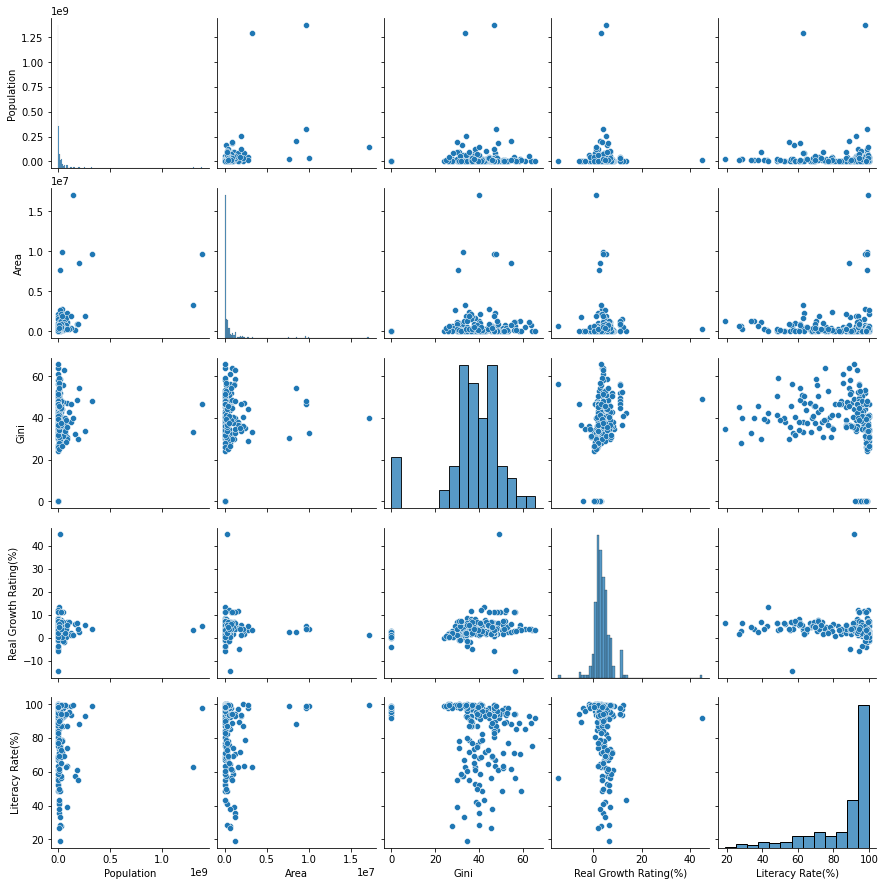

In [182]:
sns.pairplot(df_country_data_copy)

In [183]:
df_country_data_copy.to_csv('data/Cleaned Country Data.csv')

## Happiness Data


In [184]:
df_Happiness_1 = pd.read_csv('data/Happiness_Dataset/2015.csv')

Below table shows:
> The labeling of attributes is consistent

> No null values are present

> The entries are of consistent data type 

In [185]:
df_Happiness_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Now we are trying to examine 
> Zero entries

>Handling of outliers

From the table below we conclude the columns where there is zeros 

In [186]:
df_Happiness_1.where(df_Happiness_1== 0).count()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
Dystopia Residual                0
dtype: int64

These are records with 0 values they could be neglected as they will not be dropped as they are valid

In [187]:
output = df_Happiness_1[df_Happiness_1.eq(0).any(axis=1)]


In [188]:
output

Country                           Region  \
73                  Indonesia                Southeastern Asia   
101                    Greece                   Western Europe   
111                      Iraq  Middle East and Northern Africa   
119          Congo (Kinshasa)               Sub-Saharan Africa   
122              Sierra Leone               Sub-Saharan Africa   
147  Central African Republic               Sub-Saharan Africa   

     Happiness Rank  Happiness Score  Standard Error  \
73               74            5.399         0.02596   
101             102            4.857         0.05062   
111             112            4.677         0.05232   
119             120            4.517         0.03680   
122             123            4.507         0.07068   
147             148            3.678         0.06112   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
73                    0.82827  1.08708                   0.63793  0.46611   
101                   1.15406  0.92933                   0.88213  0.07699   
111                   0.98549  0.81889                   0.60237  0.00000   
119                   0.00000  1.00120                   0.09806  0.22605   
122                   0.33024  0.95571                   0.00000  0.40840   
147                   0.07850  0.00000                   0.06699  0.48879   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
73                         0.00000     0.51535            1.86399  
101                        0.01397     0.00000            1.80101  
111                        0.13788     0.17922            1.95335  
119                        0.07625     0.24834            2.86712  
122                        0.08786     0.21488            2.51009  
147                        0.08289     0.23835            2.72230

Through checking the distribution we conclude that zero entries are normal entries of the attribute

In [189]:
df_Happiness_1.describe(include='all')

Country              Region  Happiness Rank  Happiness Score  \
count         158                 158      158.000000       158.000000   
unique        158                  10             NaN              NaN   
top     Venezuela  Sub-Saharan Africa             NaN              NaN   
freq            1                  40             NaN              NaN   
mean          NaN                 NaN       79.493671         5.375734   
std           NaN                 NaN       45.754363         1.145010   
min           NaN                 NaN        1.000000         2.839000   
25%           NaN                 NaN       40.250000         4.526000   
50%           NaN                 NaN       79.500000         5.232500   
75%           NaN                 NaN      118.750000         6.243750   
max           NaN                 NaN      158.000000         7.587000   

        Standard Error  Economy (GDP per Capita)      Family  \
count       158.000000                158.000000  158.000000   
unique             NaN                       NaN         NaN   
top                NaN                       NaN         NaN   
freq               NaN                       NaN         NaN   
mean          0.047885                  0.846137    0.991046   
std           0.017146                  0.403121    0.272369   
min           0.018480                  0.000000    0.000000   
25%           0.037268                  0.545808    0.856823   
50%           0.043940                  0.910245    1.029510   
75%           0.052300                  1.158448    1.214405   
max           0.136930                  1.690420    1.402230   

        Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                 158.000000  158.000000                     158.000000   
unique                       NaN         NaN                            NaN   
top                          NaN         NaN                            NaN   
freq                         NaN         NaN                            NaN   
mean                    0.630259    0.428615                       0.143422   
std                     0.247078    0.150693                       0.120034   
min                     0.000000    0.000000                       0.000000   
25%                     0.439185    0.328330                       0.061675   
50%                     0.696705    0.435515                       0.107220   
75%                     0.811013    0.549092                       0.180255   
max                     1.025250    0.669730                       0.551910   

        Generosity  Dystopia Residual  
count   158.000000         158.000000  
unique         NaN                NaN  
top            NaN                NaN  
freq           NaN                NaN  
mean      0.237296           2.098977  
std       0.126685           0.553550  
min       0.000000           0.328580  
25%       0.150553           1.759410  
50%       0.216130           2.095415  
75%       0.309883           2.462415  
max       0.795880           3.602140

Next we are going to add a Year column on the data set for integration this is done by adding a column called year filled with the year of the data n times where n is the number of entires in the dataframe

In [190]:
year=[2015]*158                                          
df_Happiness_1['Year']=year

Now after tidying the first year we will repeat the steps on the rest years

In [191]:
df_Happiness_2 = pd.read_csv('data/Happiness_Dataset/2016.csv')
df_Happiness_3 = pd.read_csv('data/Happiness_Dataset/2017.csv')
df_Happiness_4 = pd.read_csv('data/Happiness_Dataset/2018.csv')
df_Happiness_5 = pd.read_csv('data/Happiness_Dataset/2019.csv')

In [192]:
df_Happiness_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [193]:
year=[2016]*157
df_Happiness_2['Year']=year

Here we can observe the inconsistency of the column labels so we replace resolve them to be unified across all dataframes


In [194]:
df_Happiness_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [195]:
year=[2017]*155
df_Happiness_3['Year']=year

In [196]:
df_Happiness_3=df_Happiness_3.rename(columns={'Happiness.Rank':'Happiness Rank','Happiness.Score':'Happiness Score',
                                              'Economy..GDP.per.Capita.':'Economy (GDP per Capita)','Health..Life.Expectancy.':'Health (Life Expectancy)',
                                              'Trust..Government.Corruption.':'Trust (Government Corruption)',
                                             'Dystopia.Residual':'Dystopia Residual' })

In [197]:
df_Happiness_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.4+ KB


In [198]:
year=[2018]*156
df_Happiness_4['Year']=year

In [199]:
df_Happiness_4=df_Happiness_4.rename(columns={'Overall rank':'Happiness Rank','Score':'Happiness Score',
                                                        'GDP per capita':'Economy (GDP per Capita)',
                                                        'Healthy life expectancy':'Health (Life Expectancy)',
                                                        'Freedom to make life choices':'Freedom',
                                                        'Perceptions of corruption':'Trust (Government Corruption)',
                                              'Social support':'Family','Country or region':'Country'})

In [200]:
year=[2019]*156
df_Happiness_5['Year']=year

In [201]:
df_Happiness_5=df_Happiness_5.rename(columns={'Country or region':'Country','Social support':'Family','Overall rank':'Happiness Rank','Score':'Happiness Score','GDP per capita':'Economy (GDP per Capita)','Healthy life expectancy':'Health (Life Expectancy)','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust (Government Corruption)'})

We all the dataframes are tidy and the label of columns is consistent we are going to integrate the data

#### Data Integration


In [202]:
frames=[df_Happiness_1,df_Happiness_2,df_Happiness_3,df_Happiness_4,df_Happiness_5]

In [203]:
df_happiness_integrated=pd.concat(frames,ignore_index=True)

Here we could clearly see the columns with null values, we will impute nulls for Dystopia Residual while ignoring other columns as we will not consider it in our research question 

In [204]:
df_happiness_integrated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 782 non-null    int64  
 3   Happiness Score                782 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         782 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  781 non-null    float64
 10  Generosity                     782 non-null    float64
 11  Dystopia Residual              470 non-null    float64
 12  Year                           782 non-null    int

The standard error and lower and higher confidence columns will be dropped as they have alot of nulls and are irrelevant in our analysis

In [205]:
df_happiness_integrated=df_happiness_integrated.drop(columns=['Lower Confidence Interval','Upper Confidence Interval','Whisker.high','Whisker.low','Standard Error'])

We also need to first fill the region nulls using the entries that are known we will create a small dataframe to map the relation between countries and regions

In [206]:
country=df_happiness_integrated[["Country","Region"]]

In [207]:
xn=country.drop_duplicates(subset=['Country'])

In [208]:
df_happiness_integrated=pd.merge(df_happiness_integrated.drop(columns=['Region']),xn)

In [209]:
df_happiness_integrated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 781
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Happiness Rank                 782 non-null    int64  
 2   Happiness Score                782 non-null    float64
 3   Economy (GDP per Capita)       782 non-null    float64
 4   Family                         782 non-null    float64
 5   Health (Life Expectancy)       782 non-null    float64
 6   Freedom                        782 non-null    float64
 7   Trust (Government Corruption)  781 non-null    float64
 8   Generosity                     782 non-null    float64
 9   Dystopia Residual              470 non-null    float64
 10  Year                           782 non-null    int64  
 11  Region                         774 non-null    object 
dtypes: float64(8), int64(2), object(2)
memory usage: 7

After filling the region we could observe there is still nulls which are places with undefined region these entries could be droped

In [210]:
df_happiness_integrated.isna().sum()

Country                            0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                312
Year                               0
Region                             8
dtype: int64

In [211]:
df_happiness_integrated=df_happiness_integrated[df_happiness_integrated['Region'].notna()]

In [212]:
df_happiness_integrated=df_happiness_integrated[df_happiness_integrated['Trust (Government Corruption)'].notna()]

In [213]:
df_happiness_integrated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 773
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        773 non-null    object 
 1   Happiness Rank                 773 non-null    int64  
 2   Happiness Score                773 non-null    float64
 3   Economy (GDP per Capita)       773 non-null    float64
 4   Family                         773 non-null    float64
 5   Health (Life Expectancy)       773 non-null    float64
 6   Freedom                        773 non-null    float64
 7   Trust (Government Corruption)  773 non-null    float64
 8   Generosity                     773 non-null    float64
 9   Dystopia Residual              468 non-null    float64
 10  Year                           773 non-null    int64  
 11  Region                         773 non-null    object 
dtypes: float64(8), int64(2), object(2)
memory usage: 7

Now we are going to add the Dystopia Residual null values using linear regressin first we see corroletion between other columns to identify the attribute with most correlation as it the factor in the linear regression


In [214]:
df_happiness_integrated.corr()

Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992083   
Happiness Score                     -0.992083         1.000000   
Economy (GDP per Capita)            -0.795280         0.790333   
Family                              -0.646167         0.650386   
Health (Life Expectancy)            -0.746256         0.745010   
Freedom                             -0.540135         0.553490   
Trust (Government Corruption)       -0.377941         0.403120   
Generosity                          -0.119545         0.139316   
Dystopia Residual                   -0.488010         0.494532   
Year                                -0.005029         0.004610   

                               Economy (GDP per Capita)    Family  \
Happiness Rank                                -0.795280 -0.646167   
Happiness Score                                0.790333  0.650386   
Economy (GDP per Capita)                       1.000000  0.591225   
Family                                         0.591225  1.000000   
Health (Life Expectancy)                       0.787619  0.573131   
Freedom                                        0.345164  0.419280   
Trust (Government Corruption)                  0.309341  0.130695   
Generosity                                    -0.014782 -0.037258   
Dystopia Residual                              0.039132 -0.077516   
Year                                           0.015364  0.366825   

                               Health (Life Expectancy)   Freedom  \
Happiness Rank                                -0.746256 -0.540135   
Happiness Score                                0.745010  0.553490   
Economy (GDP per Capita)                       0.787619  0.345164   
Family                                         0.573131  0.419280   
Health (Life Expectancy)                       1.000000  0.342299   
Freedom                                        0.342299  1.000000   
Trust (Government Corruption)                  0.251151  0.462233   
Generosity                                     0.010058  0.291619   
Dystopia Residual                              0.067105  0.042212   
Year                                           0.126385  0.009837   

                               Trust (Government Corruption)  Generosity  \
Happiness Rank                                     -0.377941   -0.119545   
Happiness Score                                     0.403120    0.139316   
Economy (GDP per Capita)                            0.309341   -0.014782   
Family                                              0.130695   -0.037258   
Health (Life Expectancy)                            0.251151    0.010058   
Freedom                                             0.462233    0.291619   
Trust (Government Corruption)                       1.000000    0.317107   
Generosity                                          0.317107    1.000000   
Dystopia Residual                                   0.008469   -0.109632   
Year                                               -0.120656   -0.192539   

                               Dystopia Residual      Year  
Happiness Rank                         -0.488010 -0.005029  
Happiness Score                         0.494532  0.004610  
Economy (GDP per Capita)                0.039132  0.015364  
Family                                 -0.077516  0.366825  
Health (Life Expectancy)                0.067105  0.126385  
Freedom                                 0.042212  0.009837  
Trust (Government Corruption)           0.008469 -0.120656  
Generosity                             -0.109632 -0.192539  
Dystopia Residual                       1.000000 -0.172867  
Year                                   -0.172867  1.000000

In [215]:
y_pred = []
y_true = []

In [216]:
df_filter = df_happiness_integrated[df_happiness_integrated['Dystopia Residual'] > 0].copy()

In [217]:
kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(df_filter):
    df_test = df_filter.iloc[test_index]
    df_train = df_filter.iloc[train_index]

In [218]:
for train_index, test_index in kf.split(df_filter):
    X_train = np.array(df_train['Happiness Score']).reshape(-1, 1)     
    y_train = np.array(df_train['Dystopia Residual']).reshape(-1, 1)
    X_test = np.array(df_test['Happiness Score']).reshape(-1, 1)  
    y_test = np.array(df_test['Dystopia Residual']).reshape(-1, 1)

In [219]:
for train_index, test_index in kf.split(df_filter):
    model = LinearRegression()
    model.fit(X_train, y_train)

In [220]:
for train_index, test_index in kf.split(df_filter):
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test[0])

Finally we will fill the nulls using our model predictions

In [221]:
df_happiness_integrated['Dystopia Residual']=np.where(df_happiness_integrated["Dystopia Residual"].isnull() ,model.predict(np.array(df_happiness_integrated["Happiness Score"]).reshape(-1, 1))[0][0] , df_happiness_integrated['Dystopia Residual'])

In [222]:
df_happiness_integrated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 773
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        773 non-null    object 
 1   Happiness Rank                 773 non-null    int64  
 2   Happiness Score                773 non-null    float64
 3   Economy (GDP per Capita)       773 non-null    float64
 4   Family                         773 non-null    float64
 5   Health (Life Expectancy)       773 non-null    float64
 6   Freedom                        773 non-null    float64
 7   Trust (Government Corruption)  773 non-null    float64
 8   Generosity                     773 non-null    float64
 9   Dystopia Residual              773 non-null    float64
 10  Year                           773 non-null    int64  
 11  Region                         773 non-null    object 
dtypes: float64(8), int64(2), object(2)
memory usage: 7

Now we are going to handle outliers using IQR

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

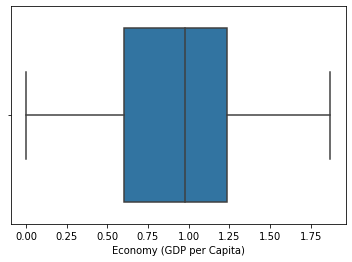

In [223]:
sns.boxplot(x=df_happiness_integrated['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family'>

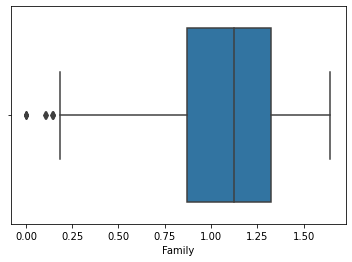

In [224]:
sns.boxplot(x=df_happiness_integrated['Family'])

In [225]:
Q2= df_happiness_integrated['Family'].quantile(0.5)
Q1 = df_happiness_integrated['Family'].quantile(0.25)
Q3 = df_happiness_integrated['Family'].quantile(0.75)
IQR = Q3 - Q1
arr_1 = df_happiness_integrated['Family']< (Q1 - 1.5 * IQR)
arr_2 = df_happiness_integrated['Family']> (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)

In [226]:
df_happiness_integrated['Family']= np.where(mask , Q2,df_happiness_integrated['Family'])


<AxesSubplot:xlabel='Health (Life Expectancy)'>

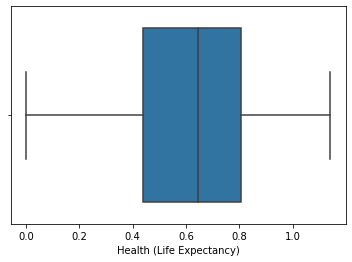

In [227]:
sns.boxplot(x=df_happiness_integrated['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom'>

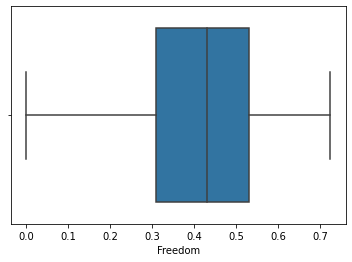

In [228]:
sns.boxplot(x=df_happiness_integrated['Freedom'])

Too much outliers could be investigated to find any relation

<AxesSubplot:xlabel='Trust (Government Corruption)'>

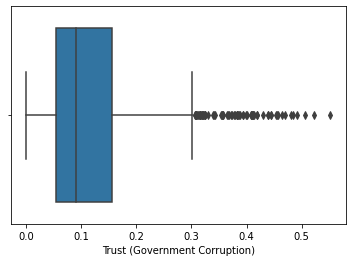

In [229]:
sns.boxplot(x=df_happiness_integrated['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity'>

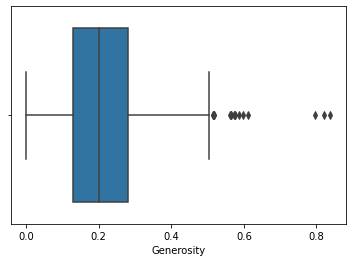

In [230]:
sns.boxplot(x=df_happiness_integrated['Generosity'])

In [231]:
Q2= df_happiness_integrated['Generosity'].quantile(0.5)
Q1 = df_happiness_integrated['Generosity'].quantile(0.25)
Q3 = df_happiness_integrated['Generosity'].quantile(0.75)
IQR = Q3 - Q1
arr_1 = df_happiness_integrated['Generosity']< (Q1 - 1.5 * IQR)
arr_2 = df_happiness_integrated['Generosity']> (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)

In [232]:
df_happiness_integrated['Generosity']= np.where(mask , Q2,df_happiness_integrated['Generosity'])


In [233]:
df_happiness_integrated.to_csv('data/Happiness_Dataset/integrated_clean.csv')

# Formulate the questions

- Q1: How does the Literacy and the number of schooling years affect the country happines score?
- Q2: Does the people with high literacy are more likely to drink alcohol?
- Q3: How the mental health measured by happiness affects the physical health measured by BMI?
- Q4: What is the effect of the geo location on adult mortality?
- Q5: Is there any relationship between real growth rating of a country and the freedom on it?
- Q6: How does the government corruption of a country affect its gini?
- Q7: Does the freedom rate affect the life expectancy of Adults?

# Integrating the datasets

Load the data of the three dataset

In [4]:
# load country dataset
df_country = pd.read_csv('data/Cleaned Country Data.csv')
df_country.head(6)

Unnamed: 0            Name   Region        Subregion  Population  \
0           0     Afghanistan     Asia    Southern Asia    27657145   
1           1   Åland Islands   Europe  Northern Europe       28875   
2           2         Albania   Europe  Southern Europe     2886026   
3           3         Algeria   Africa  Northern Africa    40400000   
4           4  American Samoa  Oceania        Polynesia       57100   
5           5         Andorra   Europe  Southern Europe       78014   

        Area  Gini  Real Growth Rating(%)  Literacy Rate(%)  
0   652230.0  27.8                    3.1              28.1  
1     1580.0  31.1                    1.9              99.3  
2    28748.0  34.5                    7.0              98.7  
3  2381741.0  35.3                    3.1              79.0  
4      199.0   0.0                    3.0              97.0  
5      468.0  34.6                   -1.6             100.0

In [5]:
# load life expectancy dataset
df_life_expectancy = pd.read_csv('data/Cleaned Life Expectancy Data.csv')
df_life_expectancy.head(6)

Unnamed: 0      Country  Year      Status  Life expectancy  \
0           0  Afghanistan  2015  Developing             65.0   
1           1  Afghanistan  2014  Developing             59.9   
2           2  Afghanistan  2013  Developing             59.9   
3           3  Afghanistan  2012  Developing             59.5   
4           4  Afghanistan  2011  Developing             59.2   
5           5  Afghanistan  2010  Developing             58.8   

   Adult mortality  Infant deaths  Alcohol  Percentage expenditure  \
0            263.0             62     0.01               71.279624   
1            271.0             64     0.01               73.523582   
2            268.0             66     0.01               73.219243   
3            272.0             69     0.01               78.184215   
4            275.0             71     0.01                7.097109   
5            279.0             74     0.01               79.679367   

   Hepatitis B  ...  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0         65.0  ...    6.0               8.16        65.0       0.1   
1         62.0  ...   58.0               8.18        62.0       0.1   
2         64.0  ...   62.0               8.13        64.0       0.1   
3         67.0  ...   67.0               8.52        67.0       0.1   
4         68.0  ...   68.0               7.87        68.0       0.1   
5         66.0  ...   66.0               9.20        66.0       0.1   

          GDP  Population  Thinness 10-19 years  Thinness 5-9 years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   
5  553.328940   2883167.0                  18.4                18.4   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  

[6 rows x 23 columns]

In [6]:
# load happiness dataset
df_happiness = pd.read_csv('data/Happiness_Dataset/integrated_clean.csv')
df_happiness.head(6)

Unnamed: 0      Country  Happiness Rank  Happiness Score  \
0           0  Switzerland               1            7.587   
1           1  Switzerland               2            7.509   
2           2  Switzerland               4            7.494   
3           3  Switzerland               5            7.487   
4           4  Switzerland               6            7.480   
5           5      Iceland               2            7.561   

   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                   1.39651  1.349510                  0.941430  0.665570   
1                   1.52733  1.145240                  0.863030  0.585570   
2                   1.56498  1.516912                  0.858131  0.620071   
3                   1.42000  1.549000                  0.927000  0.660000   
4                   1.45200  1.526000                  1.052000  0.572000   
5                   1.30232  1.402230                  0.947840  0.628770   

   Trust (Government Corruption)  Generosity  Dystopia Residual  Year  \
0                       0.419780    0.296780           2.517380  2015   
1                       0.412030    0.280830           2.694630  2016   
2                       0.367007    0.290549           2.276716  2017   
3                       0.357000    0.256000           2.617966  2018   
4                       0.343000    0.263000           2.617966  2019   
5                       0.141450    0.436300           2.702010  2015   

           Region  
0  Western Europe  
1  Western Europe  
2  Western Europe  
3  Western Europe  
4  Western Europe  
5  Western Europe

The first challenge here is that the Happiness dataset are collected for years 2015 up to 2019 while the Life expectancy are collected up to 2015 thus interesecting only at 2015 so inorder to count for the other years we are aggregating the values of each country using median. We use the median as most of the attributes is skewed for the single country.

In [7]:
df_happiness_Country_SubRegion=df_happiness[['Country','Region']].rename(columns={"Region": "Sub Region"})
df_happiness_Country_SubRegion=df_happiness_Country_SubRegion.drop_duplicates(subset='Country')
df_happiness_Country_SubRegion

Country                   Sub Region
0          Switzerland               Western Europe
5              Iceland               Western Europe
10             Denmark               Western Europe
15              Norway               Western Europe
20              Canada                North America
..                 ...                          ...
757             Belize  Latin America and Caribbean
760            Somalia           Sub-Saharan Africa
764  Somaliland Region           Sub-Saharan Africa
765            Namibia           Sub-Saharan Africa
769        South Sudan           Sub-Saharan Africa

[164 rows x 2 columns]

In [8]:
df_happiness_median=df_happiness.groupby('Country').median().reset_index()[["Country","Happiness Score",
                                                                            "Trust (Government Corruption)","Freedom"]]
df_life_expectancy_median=df_life_expectancy.groupby('Country').median().reset_index()[["Country","Schooling","Alcohol","BMI","Adult mortality"]]
df_country_chosen_attribute = df_country[["Name","Literacy Rate(%)","Gini","Region", "Real Growth Rating(%)"]].rename(columns={"Name": "Country"})

Merge happiness abd life expectancy datasets

In [9]:
df_happiness_life_expectancey=pd.merge(df_life_expectancy_median,df_happiness_median,on="Country")
df_happiness_life_expectancey=pd.merge(df_happiness_life_expectancey,df_happiness_Country_SubRegion,on="Country")
df_happiness_life_expectancey

Country  Schooling  Alcohol    BMI  Adult mortality  Happiness Score  \
0    Afghanistan       8.55     0.01  15.45            284.0           3.5750   
1        Albania      11.80     4.95  52.15             17.5           4.6550   
2        Algeria      12.45     0.45  50.80            124.5           5.6050   
3         Angola       7.90     6.35  18.50            367.0           3.8305   
4      Argentina      16.35     7.93  57.75            126.0           6.5740   
..           ...        ...      ...    ...              ...              ...   
131      Uruguay      15.50     6.21  58.60            118.5           6.4540   
132   Uzbekistan      11.80     1.60  37.80            184.0           6.0030   
133        Yemen       8.55     0.04  34.80            235.5           3.5930   
134       Zambia      11.25     2.41  18.60            364.5           4.5140   
135     Zimbabwe       9.80     4.43  27.70            495.5           3.8750   

     Trust (Government Corruption)   Freedom                       Sub Region  
0                         0.061158  0.106180                    Southern Asia  
1                         0.039864  0.381499       Central and Eastern Europe  
2                         0.146096  0.210060  Middle East and Northern Africa  
3                         0.070470  0.002945               Sub-Saharan Africa  
4                         0.059740  0.471000      Latin America and Caribbean  
..                             ...       ...                              ...  
131                       0.178062  0.579392      Latin America and Caribbean  
132                       0.259000  0.658210       Central and Eastern Europe  
133                       0.064000  0.244000  Middle East and Northern Africa  
134                       0.087000  0.461603               Sub-Saharan Africa  
135                       0.089000  0.336384               Sub-Saharan Africa  

[136 rows x 9 columns]

Merge all datasets 

In [17]:
df_all_data=pd.merge(df_happiness_life_expectancey,df_country_chosen_attribute,on="Country")
df_all_data

Country  Schooling  Alcohol    BMI  Adult mortality  Happiness Score  \
0    Afghanistan       8.55     0.01  15.45            284.0           3.5750   
1        Albania      11.80     4.95  52.15             17.5           4.6550   
2        Algeria      12.45     0.45  50.80            124.5           5.6050   
3         Angola       7.90     6.35  18.50            367.0           3.8305   
4      Argentina      16.35     7.93  57.75            126.0           6.5740   
..           ...        ...      ...    ...              ...              ...   
131      Uruguay      15.50     6.21  58.60            118.5           6.4540   
132   Uzbekistan      11.80     1.60  37.80            184.0           6.0030   
133        Yemen       8.55     0.04  34.80            235.5           3.5930   
134       Zambia      11.25     2.41  18.60            364.5           4.5140   
135     Zimbabwe       9.80     4.43  27.70            495.5           3.8750   

     Trust (Government Corruption)   Freedom                       Sub Region  \
0                         0.061158  0.106180                    Southern Asia   
1                         0.039864  0.381499       Central and Eastern Europe   
2                         0.146096  0.210060  Middle East and Northern Africa   
3                         0.070470  0.002945               Sub-Saharan Africa   
4                         0.059740  0.471000      Latin America and Caribbean   
..                             ...       ...                              ...   
131                       0.178062  0.579392      Latin America and Caribbean   
132                       0.259000  0.658210       Central and Eastern Europe   
133                       0.064000  0.244000  Middle East and Northern Africa   
134                       0.087000  0.461603               Sub-Saharan Africa   
135                       0.089000  0.336384               Sub-Saharan Africa   

     Literacy Rate(%)  Gini    Region  Real Growth Rating(%)  
0                28.1  27.8      Asia                    3.1  
1                98.7  34.5    Europe                    7.0  
2                79.0  35.3    Africa                    3.1  
3                70.4  58.6    Africa                    5.6  
4                97.9  44.5  Americas                    3.5  
..                ...   ...       ...                    ...  
131              98.1  39.7  Americas                    3.5  
132              99.4  36.7      Asia                    7.0  
133              65.3  37.7      Asia                    3.8  
134              61.4  54.6    Africa                    6.0  
135              69.6  45.9    Africa                    4.8  

[136 rows x 13 columns]

## The results

### Q1: How does the Literacy and the number of schooling years affect the country happines score?

check for outlier

<AxesSubplot:xlabel='Schooling'>

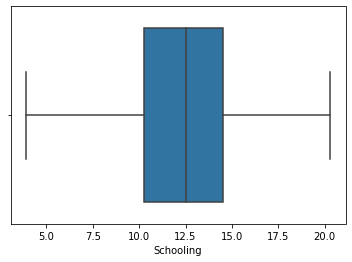

In [241]:
sns.boxplot(x=df_all_data['Schooling'])

<AxesSubplot:xlabel='Schooling', ylabel='Count'>

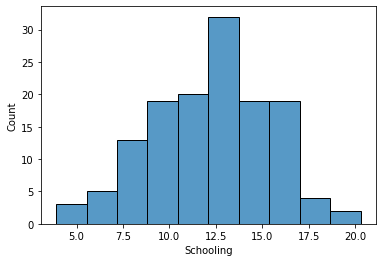

In [242]:
sns.histplot(x=df_all_data['Schooling'])

Show the outlier records

In [243]:
df_all_data[(df_all_data["Schooling"]<5) | (df_all_data["Schooling"]>18)]

Country  Schooling  Alcohol    BMI  Adult mortality  Happiness Score  \
6     Australia      20.30   10.170  62.70             66.0            7.284   
35     Djibouti       4.75    0.530  30.55            284.0            4.369   
54      Iceland      18.25    7.310  57.15             56.5            7.501   
91  New Zealand      19.20    9.185  63.50             75.5            7.314   
93        Niger       3.90    0.110  16.30            267.5            4.028   

    Trust (Government Corruption)   Freedom                 Sub Region  \
6                        0.302000  0.601607  Australia and New Zealand   
35                       0.281050  0.460740         Sub-Saharan Africa   
54                       0.141450  0.627163             Western Europe   
91                       0.389000  0.614062  Australia and New Zealand   
93                       0.138573  0.380410         Sub-Saharan Africa   

    Literacy Rate(%)  Gini   Region  Real Growth Rating(%)  
6               99.0  30.5  Oceania                    2.5  
35              67.9  40.0   Africa                    5.0  
54              99.0  31.1   Europe                    1.9  
91              99.0  36.2  Oceania                    2.5  
93              19.1  34.6   Africa                    6.3

we could see that outlier value is make sense as they are could be seens for those kind of countries.

<AxesSubplot:xlabel='Literacy Rate(%)'>

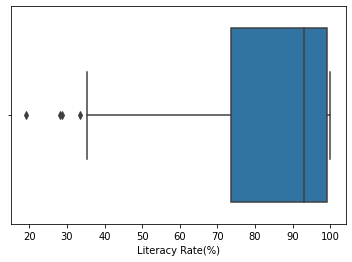

In [244]:
sns.boxplot(x=df_all_data['Literacy Rate(%)'])

Show the outlier records

In [245]:
df_all_data[df_all_data["Literacy Rate(%)"]<30]

Country  Schooling  Alcohol    BMI  Adult mortality  Happiness Score  \
0    Afghanistan       8.55     0.01  15.45            284.0            3.575   
20  Burkina Faso       5.15     4.55  15.35            285.5            4.032   
93         Niger       3.90     0.11  16.30            267.5            4.028   

    Trust (Government Corruption)   Freedom          Sub Region  \
0                        0.061158  0.106180       Southern Asia   
20                       0.125330  0.324368  Sub-Saharan Africa   
93                       0.138573  0.380410  Sub-Saharan Africa   

    Literacy Rate(%)  Gini  Region  Real Growth Rating(%)  
0               28.1  27.8    Asia                    3.1  
20              28.7  39.8  Africa                    6.5  
93              19.1  34.6  Africa                    6.3

we could see that outlier value is make sense as they are could be seens for those kind of countries.

<AxesSubplot:xlabel='Happiness Score'>

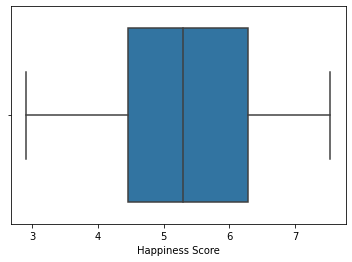

In [246]:
sns.boxplot(x=df_all_data['Happiness Score'])

no autlier in happiness score

see the corelations between the features

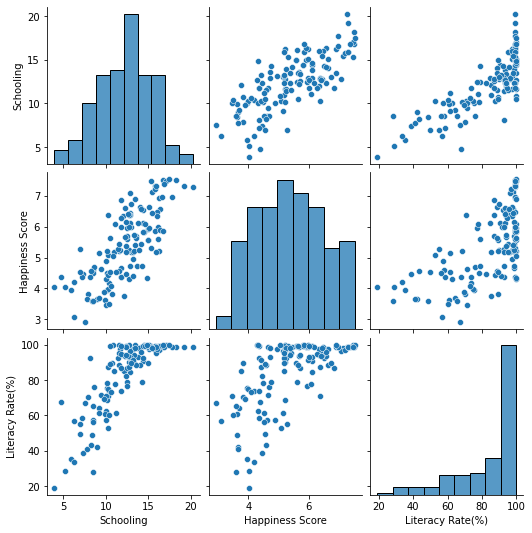

In [247]:
sns.pairplot(df_all_data[["Schooling","Happiness Score","Literacy Rate(%)"]]) 

<AxesSubplot:>

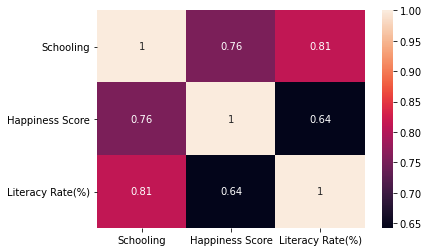

In [248]:
sns.heatmap(df_all_data[["Schooling","Happiness Score","Literacy Rate(%)"]].corr(),annot = True)

as we can se there are some correlation between the attributes especially the literacy rate and schooling

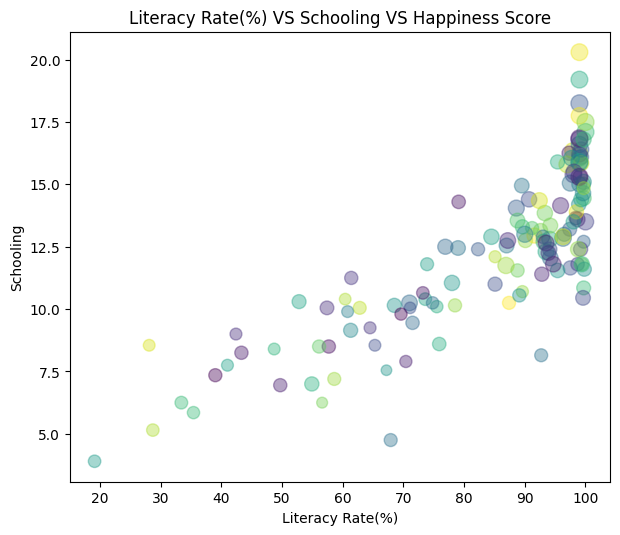

In [249]:
fig_1 = plt.figure(figsize=(6,5),dpi=100)
ax_1 = fig_1.add_axes([0.1,0.1,0.9,0.9]) 
ax_1.set_xlabel('Literacy Rate(%)')
ax_1.set_ylabel('Schooling')
ax_1.set_title('Literacy Rate(%) VS Schooling VS Happiness Score')

color_arr = np.random.rand(len(df_all_data["Happiness Score"])) 
ax_1.scatter(df_all_data["Literacy Rate(%)"],df_all_data["Schooling"],s=df_all_data["Happiness Score"]*20,c=color_arr,alpha=0.4)

We could see from the figures above:
- there is a positive correlation between schooling and happiness score so if the country has more schooling year this positively affect happiness.
- also the same for the literacy rate
- and we could find from the scatter that the highest happiness is most likely to be in the countries with more schooling years and literacy rate together.

### Q2: Does the people with high literacy are more likely to drink alcohol?

check for outlier

already check the outlier for literacy rate, check for alcohol attribute

<AxesSubplot:xlabel='Alcohol'>

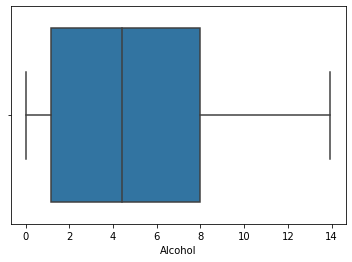

In [250]:
sns.boxplot(x=df_all_data['Alcohol'])

no outlier, check for the zeros

In [251]:
df_all_data[df_all_data["Alcohol"]==0]["Alcohol"].count()

0

no zeros value, so we are good to go\
check the correlation

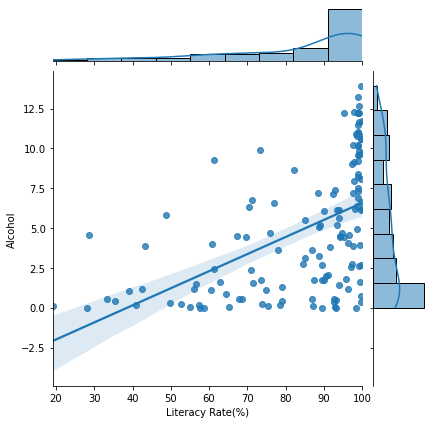

In [252]:
sns.jointplot(x='Literacy Rate(%)',y='Alcohol',data=df_all_data,kind='reg')

We could see from the figures above:
- We could see that there are few correlations as the literacy rate increase in the country the alcohol drink is increase.
- But we could find that there are a lot of countries that have a high literacy rate but it is the consumption of alcohol is so low.

## Q3: How the mental health measured by happiness affects the physical health measured by BMI?

we will check the distribution for outliers

<AxesSubplot:xlabel='BMI'>

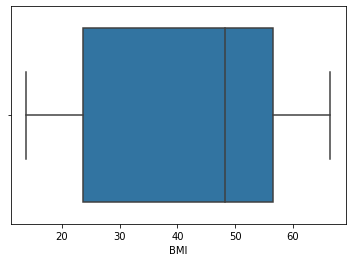

In [253]:
sns.boxplot(x=df_all_data['BMI'])

<AxesSubplot:xlabel='Happiness Score'>

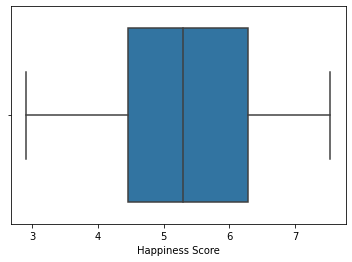

In [254]:
sns.boxplot(x=df_all_data['Happiness Score'])

In [255]:
df_all_data['eval']=[np.nan]*136

In [256]:
arr_1 = df_all_data['BMI']>18.5
arr_2 = df_all_data['BMI']<24.9
mask = (arr_1 & arr_2)

In [257]:
df_all_data['eval']= np.where(df_all_data['BMI']<=18.5,"underweight", df_all_data['eval'])

In [258]:
df_all_data['eval']= np.where(df_all_data['BMI']>=24.9,"overweight", df_all_data['eval'])

In [259]:
df_all_data['eval']= np.where( mask,"healthy", df_all_data['eval'])

The figure below shows that the happiness score that low happiness score could cause underweight and high happiness score could cause being overweight.

<AxesSubplot:xlabel='BMI', ylabel='Happiness Score'>

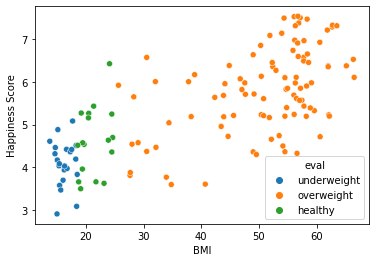

In [260]:
sns.scatterplot(x=df_all_data['BMI'], y=df_all_data['Happiness Score'],hue=df_all_data['eval'])

In [261]:
df_all_data.where(df_all_data['eval']=='healthy')[["Country","BMI","Happiness Score","eval"]].dropna()

Country    BMI  Happiness Score     eval
14          Benin  21.75            3.657  healthy
23       Cameroon  24.65            4.695  healthy
28          China  24.50            5.245  healthy
30        Comoros  19.40            3.956  healthy
47          Ghana  23.90            4.633  healthy
50         Guinea  18.75            3.656  healthy
56      Indonesia  20.50            5.262  healthy
71        Liberia  23.15            3.622  healthy
80     Mauritania  24.50            4.356  healthy
94        Nigeria  20.45            5.155  healthy
97       Pakistan  19.20            5.269  healthy
101   Philippines  21.35            5.430  healthy
108       Senegal  19.70            4.535  healthy
110  Sierra Leone  19.45            4.571  healthy
122      Thailand  24.10            6.424  healthy
123          Togo  19.10            3.495  healthy
134        Zambia  18.60            4.514  healthy

This normal distribution shows the happiness score values where the BMI index is healthy

And finally here we could observe the positive correlation between hapiness score and BMI

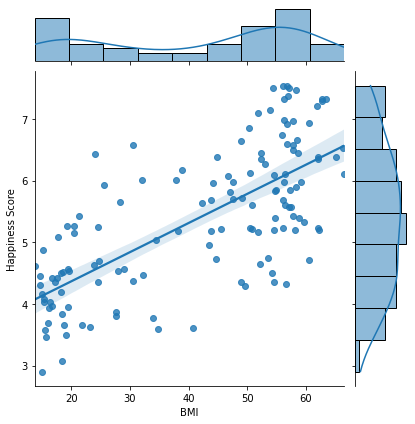

In [262]:
sns.jointplot(x=df_all_data['BMI'], y=df_all_data['Happiness Score'], kind="reg");

## Q4: What is the effect of the geo location on adult mortality?

In [263]:
df_region_adult_mortality=df_all_data[['Sub Region','Adult mortality']]
df_region_adult_mortality=df_region_adult_mortality.groupby('Sub Region').median()
df_region_adult_mortality=df_region_adult_mortality.reset_index()
df_region_adult_mortality

Sub Region  Adult mortality
0        Australia and New Zealand            70.75
1       Central and Eastern Europe           153.50
2                     Eastern Asia            90.00
3      Latin America and Caribbean           144.00
4  Middle East and Northern Africa            93.50
5                    North America            73.00
6                Southeastern Asia           187.50
7                    Southern Asia           173.50
8               Sub-Saharan Africa           308.00
9                   Western Europe            74.50

<AxesSubplot:xlabel='Adult mortality'>

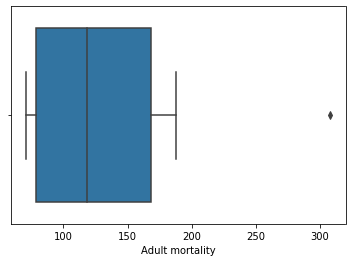

In [264]:
sns.boxplot(x=df_region_adult_mortality['Adult mortality'])

This graphs highlights the distriution of adult mortality accross different regions, It could be concluded that Sub-saharan Africa has the highest adult mortality while Autralia and Newzealand are the lowest. 

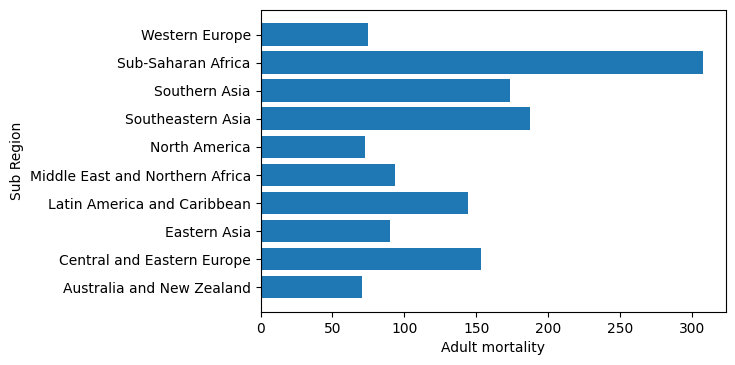

In [265]:
fig_3,axs_4 = plt.subplots(1,1,dpi=100)
axs_4.set_ylabel('Sub Region')
axs_4.set_xlabel('Adult mortality')
bar_chart = plt.barh(df_region_adult_mortality["Sub Region"],df_region_adult_mortality["Adult mortality"]) #switch x and y when you create barh

## Q5: Is there any relationship between real growth rating of a country and the freedom on it?

<AxesSubplot:xlabel='Real Growth Rating(%)'>

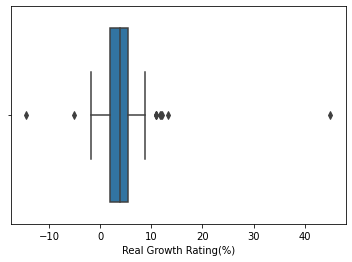

In [266]:
sns.boxplot(x=df_all_data['Real Growth Rating(%)'])

Handle the outliers of Real Growth Rating, Freedom

In [267]:
z = np.abs(stats.zscore(df_all_data['Real Growth Rating(%)']))
filtered_entries = z < 3
df_all_data_real_growth_no_outlier = df_all_data[filtered_entries]
df_all_data_real_growth_no_outlier

Country  Schooling  Alcohol    BMI  Adult mortality  Happiness Score  \
0    Afghanistan       8.55     0.01  15.45            284.0           3.5750   
1        Albania      11.80     4.95  52.15             17.5           4.6550   
2        Algeria      12.45     0.45  50.80            124.5           5.6050   
3         Angola       7.90     6.35  18.50            367.0           3.8305   
4      Argentina      16.35     7.93  57.75            126.0           6.5740   
..           ...        ...      ...    ...              ...              ...   
131      Uruguay      15.50     6.21  58.60            118.5           6.4540   
132   Uzbekistan      11.80     1.60  37.80            184.0           6.0030   
133        Yemen       8.55     0.04  34.80            235.5           3.5930   
134       Zambia      11.25     2.41  18.60            364.5           4.5140   
135     Zimbabwe       9.80     4.43  27.70            495.5           3.8750   

     Trust (Government Corruption)   Freedom                       Sub Region  \
0                         0.061158  0.106180                    Southern Asia   
1                         0.039864  0.381499       Central and Eastern Europe   
2                         0.146096  0.210060  Middle East and Northern Africa   
3                         0.070470  0.002945               Sub-Saharan Africa   
4                         0.059740  0.471000      Latin America and Caribbean   
..                             ...       ...                              ...   
131                       0.178062  0.579392      Latin America and Caribbean   
132                       0.259000  0.658210       Central and Eastern Europe   
133                       0.064000  0.244000  Middle East and Northern Africa   
134                       0.087000  0.461603               Sub-Saharan Africa   
135                       0.089000  0.336384               Sub-Saharan Africa   

     Literacy Rate(%)  Gini    Region  Real Growth Rating(%)         eval  
0                28.1  27.8      Asia                    3.1  underweight  
1                98.7  34.5    Europe                    7.0   overweight  
2                79.0  35.3    Africa                    3.1   overweight  
3                70.4  58.6    Africa                    5.6  underweight  
4                97.9  44.5  Americas                    3.5   overweight  
..                ...   ...       ...                    ...          ...  
131              98.1  39.7  Americas                    3.5   overweight  
132              99.4  36.7      Asia                    7.0   overweight  
133              65.3  37.7      Asia                    3.8   overweight  
134              61.4  54.6    Africa                    6.0      healthy  
135              69.6  45.9    Africa                    4.8   overweight  

[134 rows x 14 columns]

<AxesSubplot:xlabel='Real Growth Rating(%)'>

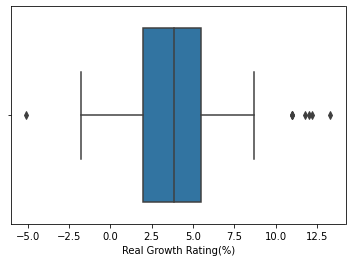

In [268]:
sns.boxplot(x=df_all_data_real_growth_no_outlier['Real Growth Rating(%)'])

It can be noticed that there are some real values that are not considered from the outliers.

<AxesSubplot:xlabel='Freedom'>

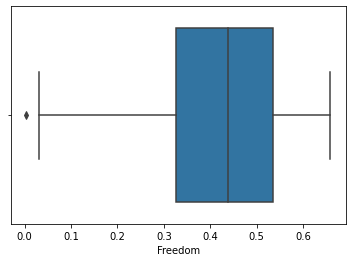

In [269]:
sns.boxplot(x=df_all_data_real_growth_no_outlier['Freedom'])

Plot relation of Freedom and RGR

<AxesSubplot:xlabel='Freedom', ylabel='Real Growth Rating(%)'>

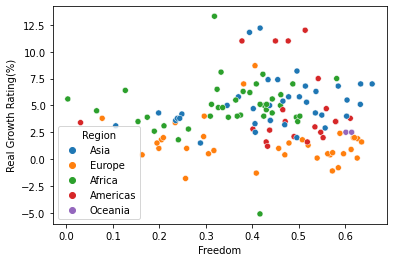

In [270]:
sns.scatterplot(x=df_all_data_real_growth_no_outlier['Freedom'], y=df_all_data_real_growth_no_outlier['Real Growth Rating(%)'],
                hue=df_all_data_real_growth_no_outlier['Region'])

Most of the europe and Asian countries are normally distributed, but the Americas tend to have the highest outlier values. However, using this graph no corrolation observed as the growth doesn't depend always on the freedom of populations, some countries may have low growth rate but high freedom and vice versa, many countries may have high freedom but low growth rate. 

We can try a plot by grouping the columns of Real Growth Rating and Freedom by Region then plot the relation

c:\users\innovator\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Region'>

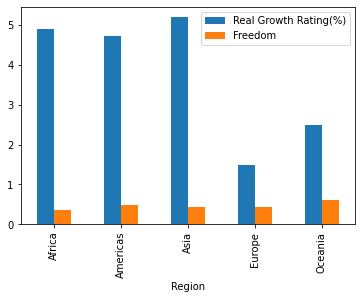

In [271]:
df_all_data_real_growth_no_outlier_copy = df_all_data_real_growth_no_outlier.copy()
#bins=[0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0]
(df_all_data_real_growth_no_outlier_copy.groupby(['Region'])['Real Growth Rating(%)','Freedom'].mean().plot.bar())

It is shown that Asia and Americas has the highest Growth Rate with Freedom, While Africa has high RGR but low Freedom. Europe has the least RGR and a low Freedom also.

<AxesSubplot:xlabel='Freedom', ylabel='Real Growth Rating(%)'>

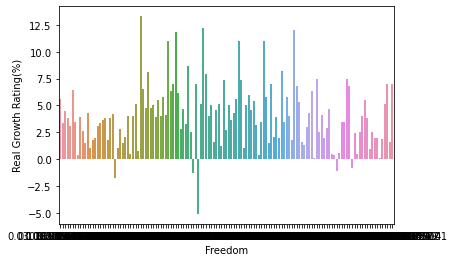

In [272]:
sns.barplot(x= 'Freedom', y='Real Growth Rating(%)', data=df_all_data_real_growth_no_outlier)

From the barplot it is shown that the distribution is symmetric relation, meaning that the correlation between RGR and freedom of country(1) has to have the same relationship (correlation) with some country(2) have the same value of RGR of country1 but it is represented in country(2) as the freedom, and  the same goes for the freedom where its value in country(1) is the same value of RGR for an existing country(2).

## Q6: How does the government corruption of a country affect its gini?

<AxesSubplot:xlabel='Trust (Government Corruption)'>

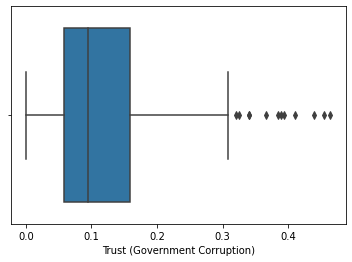

In [273]:
sns.boxplot(x=df_all_data['Trust (Government Corruption)'])

Handle the outliers of Trust (Government Corruption)

In [274]:
z = np.abs(stats.zscore(df_all_data['Trust (Government Corruption)']))
filtered_entries = z < 3
df_all_data_trust_no_outlier = df_all_data[filtered_entries]
df_all_data_trust_no_outlier

Country  Schooling  Alcohol    BMI  Adult mortality  Happiness Score  \
0    Afghanistan       8.55     0.01  15.45            284.0           3.5750   
1        Albania      11.80     4.95  52.15             17.5           4.6550   
2        Algeria      12.45     0.45  50.80            124.5           5.6050   
3         Angola       7.90     6.35  18.50            367.0           3.8305   
4      Argentina      16.35     7.93  57.75            126.0           6.5740   
..           ...        ...      ...    ...              ...              ...   
131      Uruguay      15.50     6.21  58.60            118.5           6.4540   
132   Uzbekistan      11.80     1.60  37.80            184.0           6.0030   
133        Yemen       8.55     0.04  34.80            235.5           3.5930   
134       Zambia      11.25     2.41  18.60            364.5           4.5140   
135     Zimbabwe       9.80     4.43  27.70            495.5           3.8750   

     Trust (Government Corruption)   Freedom                       Sub Region  \
0                         0.061158  0.106180                    Southern Asia   
1                         0.039864  0.381499       Central and Eastern Europe   
2                         0.146096  0.210060  Middle East and Northern Africa   
3                         0.070470  0.002945               Sub-Saharan Africa   
4                         0.059740  0.471000      Latin America and Caribbean   
..                             ...       ...                              ...   
131                       0.178062  0.579392      Latin America and Caribbean   
132                       0.259000  0.658210       Central and Eastern Europe   
133                       0.064000  0.244000  Middle East and Northern Africa   
134                       0.087000  0.461603               Sub-Saharan Africa   
135                       0.089000  0.336384               Sub-Saharan Africa   

     Literacy Rate(%)  Gini    Region  Real Growth Rating(%)         eval  
0                28.1  27.8      Asia                    3.1  underweight  
1                98.7  34.5    Europe                    7.0   overweight  
2                79.0  35.3    Africa                    3.1   overweight  
3                70.4  58.6    Africa                    5.6  underweight  
4                97.9  44.5  Americas                    3.5   overweight  
..                ...   ...       ...                    ...          ...  
131              98.1  39.7  Americas                    3.5   overweight  
132              99.4  36.7      Asia                    7.0   overweight  
133              65.3  37.7      Asia                    3.8   overweight  
134              61.4  54.6    Africa                    6.0      healthy  
135              69.6  45.9    Africa                    4.8   overweight  

[134 rows x 14 columns]

<AxesSubplot:xlabel='Trust (Government Corruption)'>

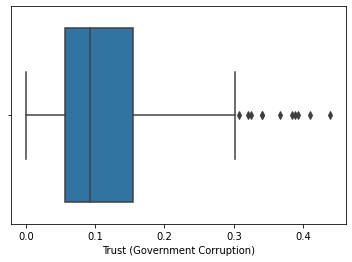

In [275]:
sns.boxplot(x=df_all_data_trust_no_outlier['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Gini'>

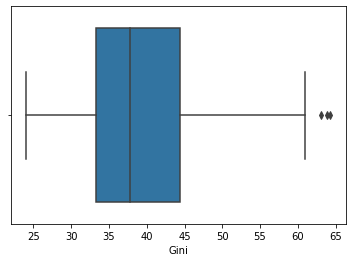

In [276]:
sns.boxplot(x=df_all_data_trust_no_outlier['Gini'])

Relation between Trust (Government Corruption) & Gini

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Gini'>

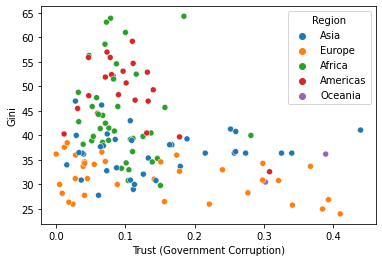

In [277]:
sns.scatterplot(x=df_all_data_trust_no_outlier['Trust (Government Corruption)'], y=df_all_data_trust_no_outlier['Gini'],
                hue=df_all_data_trust_no_outlier['Region'])

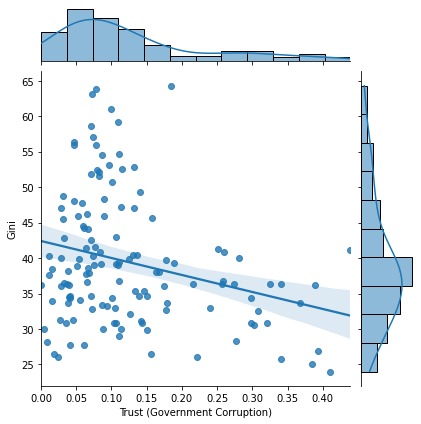

In [278]:
sns.jointplot(x=df_all_data_trust_no_outlier['Trust (Government Corruption)'], y=df_all_data_trust_no_outlier['Gini'], kind="reg")

An interesting negative corrolation could be observed from the relation between the distribution of income across population (gini) and the Trust for a government corruption. This means that the trust is inversly proportional with the value of income distribution. High trust means low income distribution across population and low trust means high income distribution. This may be because the unity of populations that have low income distribution and they trust more the government corruption across the economic challenges.

In [279]:
df_happiness_median=df_happiness.groupby('Country').median().reset_index()[["Country","Happiness Score",
                                                                            "Trust (Government Corruption)","Freedom"]]
df_life_expectancy_median=df_life_expectancy.groupby('Country').median().reset_index()[["Country","Schooling","Alcohol","BMI","Adult mortality"]]
df_country_chosen_attribute = df_country[["Name","Literacy Rate(%)","Gini", "Region", "Real Growth Rating(%)"]].rename(columns={"Name": "Country"})

df_happiness_life_expectancey=pd.merge(df_life_expectancy_median,df_happiness_median,on="Country")
df_happiness_life_expectancey=pd.merge(df_happiness_life_expectancey,df_happiness_Country_SubRegion,on="Country")
df_happiness_life_expectancey

Country  Schooling  Alcohol    BMI  Adult mortality  Happiness Score  \
0    Afghanistan       8.55     0.01  15.45            284.0           3.5750   
1        Albania      11.80     4.95  52.15             17.5           4.6550   
2        Algeria      12.45     0.45  50.80            124.5           5.6050   
3         Angola       7.90     6.35  18.50            367.0           3.8305   
4      Argentina      16.35     7.93  57.75            126.0           6.5740   
..           ...        ...      ...    ...              ...              ...   
131      Uruguay      15.50     6.21  58.60            118.5           6.4540   
132   Uzbekistan      11.80     1.60  37.80            184.0           6.0030   
133        Yemen       8.55     0.04  34.80            235.5           3.5930   
134       Zambia      11.25     2.41  18.60            364.5           4.5140   
135     Zimbabwe       9.80     4.43  27.70            495.5           3.8750   

     Trust (Government Corruption)   Freedom                       Sub Region  
0                         0.061158  0.106180                    Southern Asia  
1                         0.039864  0.381499       Central and Eastern Europe  
2                         0.146096  0.210060  Middle East and Northern Africa  
3                         0.070470  0.002945               Sub-Saharan Africa  
4                         0.059740  0.471000      Latin America and Caribbean  
..                             ...       ...                              ...  
131                       0.178062  0.579392      Latin America and Caribbean  
132                       0.259000  0.658210       Central and Eastern Europe  
133                       0.064000  0.244000  Middle East and Northern Africa  
134                       0.087000  0.461603               Sub-Saharan Africa  
135                       0.089000  0.336384               Sub-Saharan Africa  

[136 rows x 9 columns]

## Q7: Does the freedom rate affect the life expectancy of Adults?

<AxesSubplot:xlabel='Adult mortality', ylabel='Freedom'>

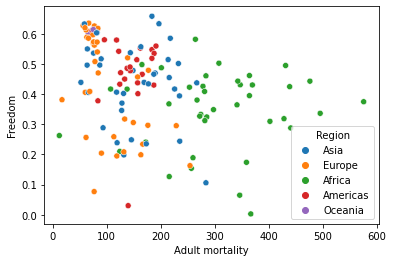

In [280]:
sns.scatterplot(x=df_all_data['Adult mortality'], y=df_all_data['Freedom'],
                hue=df_all_data['Region'])

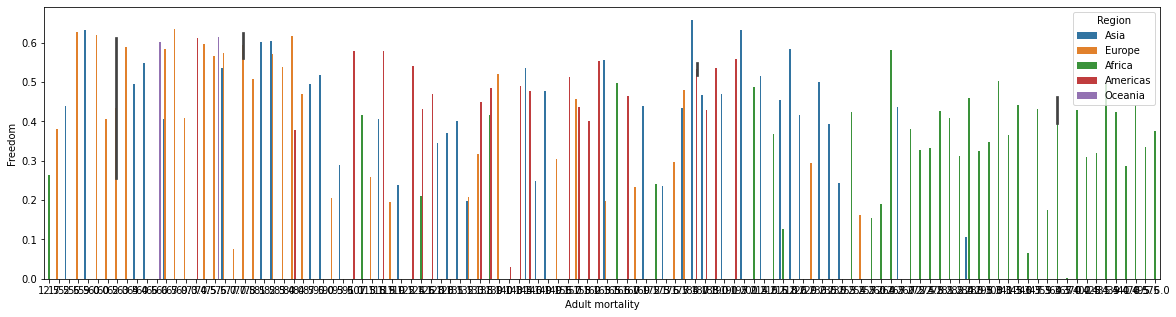

In [281]:
fig, ax = plt.subplots(figsize=(20, 5))
g = sns.barplot(x="Adult mortality", y="Freedom", hue="Region", ax=ax, data=df_all_data)

Asia and Europe has the highest Freedom but higher adult mortality than Americas. Americas has the lowest adult mortality and almost high freedom which is relatively better average than other regions. Most of Africa has the lowest adult mortality.

In [282]:
df_all_data=pd.merge(df_happiness_life_expectancey,df_country_chosen_attribute,on="Country")
df_all_data_trust_no_outlier = df_all_data[filtered_entries]

from scipy.stats import pearsonr
list_trust = df_all_data['Adult mortality']
list_gini = df_all_data['Freedom']
# Apply pearsonr:
corr, _ = pearsonr(list_trust, list_gini)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.308


There is some inverse relation between the Adult mortality and freedom meaning that as the freedom rate increases, the probability of dying a person decreases. This inverse corrolation caused by the high adult mortality of African countries.

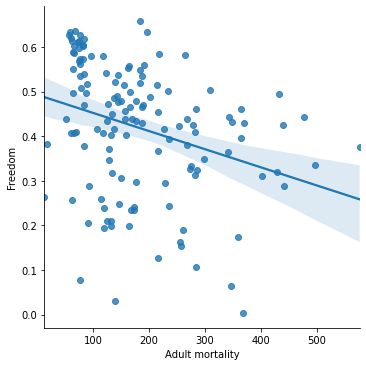

In [283]:
sns.lmplot(x='Adult mortality', y='Freedom', data=df_all_data)

# Feature Engineering

The first feature applied was the BMI column discretization in new 'eval' column where the BMI of values <=18.5 are labeled as underweight, while values >= 24.9 are labeled as overweight, and other values are healthy. That resulted an interesting exploration way that a one could easily deduce the target of the given BMI value and determine whether a person is under/overweight or healthy.

In [18]:
df_all_data['eval']=[np.nan]*136
arr_1 = df_all_data['BMI']>18.5
arr_2 = df_all_data['BMI']<24.9
mask = (arr_1 & arr_2)
df_all_data['eval']= np.where(df_all_data['BMI']<=18.5,"underweight", df_all_data['eval'])
df_all_data['eval']= np.where(df_all_data['BMI']>=24.9,"overweight", df_all_data['eval'])
df_all_data['eval']= np.where( mask,"healthy", df_all_data['eval'])
df_all_data.head(10)

Country  Schooling  Alcohol    BMI  Adult mortality  Happiness Score  \
0  Afghanistan       8.55     0.01  15.45            284.0           3.5750   
1      Albania      11.80     4.95  52.15             17.5           4.6550   
2      Algeria      12.45     0.45  50.80            124.5           5.6050   
3       Angola       7.90     6.35  18.50            367.0           3.8305   
4    Argentina      16.35     7.93  57.75            126.0           6.5740   
5      Armenia      11.80     3.91  49.00            132.0           4.3600   
6    Australia      20.30    10.17  62.70             66.0           7.2840   
7      Austria      15.40    12.26  53.95             75.5           7.1390   
8   Azerbaijan      11.60     0.73  45.60            128.5           5.2120   
9      Bahrain      14.40     1.99  56.45             76.0           6.1050   

   Trust (Government Corruption)   Freedom                       Sub Region  \
0                       0.061158  0.106180                    Southern Asia   
1                       0.039864  0.381499       Central and Eastern Europe   
2                       0.146096  0.210060  Middle East and Northern Africa   
3                       0.070470  0.002945               Sub-Saharan Africa   
4                       0.059740  0.471000      Latin America and Caribbean   
5                       0.036160  0.198470       Central and Eastern Europe   
6                       0.302000  0.601607        Australia and New Zealand   
7                       0.221060  0.567766                   Western Europe   
8                       0.179140  0.370300       Central and Eastern Europe   
9                       0.257042  0.536000  Middle East and Northern Africa   

   Literacy Rate(%)  Gini    Region  Real Growth Rating(%)         eval  
0              28.1  27.8      Asia                    3.1  underweight  
1              98.7  34.5    Europe                    7.0   overweight  
2              79.0  35.3    Africa                    3.1   overweight  
3              70.4  58.6    Africa                    5.6  underweight  
4              97.9  44.5  Americas                    3.5   overweight  
5              99.4  30.9      Asia                    4.3   overweight  
6              99.0  30.5   Oceania                    2.5   overweight  
7              98.0  26.0    Europe                    0.4   overweight  
8              99.8  33.7      Asia                    5.8   overweight  
9              90.7  36.4      Asia                    4.3   overweight

The second feature is One-hot Encoding, it may be useful when applied to the region attribute since there are only 5 values that countries assigned to. (Africa, Americas, Europe, Asia, Oceania).

In [19]:
df_all_data_encoded = pd.get_dummies(df_all_data['Region'])
df_all_data = pd.concat([df_all_data, df_all_data_encoded], axis = 1)
df_all_data.head(10)

Country  Schooling  Alcohol    BMI  Adult mortality  Happiness Score  \
0  Afghanistan       8.55     0.01  15.45            284.0           3.5750   
1      Albania      11.80     4.95  52.15             17.5           4.6550   
2      Algeria      12.45     0.45  50.80            124.5           5.6050   
3       Angola       7.90     6.35  18.50            367.0           3.8305   
4    Argentina      16.35     7.93  57.75            126.0           6.5740   
5      Armenia      11.80     3.91  49.00            132.0           4.3600   
6    Australia      20.30    10.17  62.70             66.0           7.2840   
7      Austria      15.40    12.26  53.95             75.5           7.1390   
8   Azerbaijan      11.60     0.73  45.60            128.5           5.2120   
9      Bahrain      14.40     1.99  56.45             76.0           6.1050   

   Trust (Government Corruption)   Freedom                       Sub Region  \
0                       0.061158  0.106180                    Southern Asia   
1                       0.039864  0.381499       Central and Eastern Europe   
2                       0.146096  0.210060  Middle East and Northern Africa   
3                       0.070470  0.002945               Sub-Saharan Africa   
4                       0.059740  0.471000      Latin America and Caribbean   
5                       0.036160  0.198470       Central and Eastern Europe   
6                       0.302000  0.601607        Australia and New Zealand   
7                       0.221060  0.567766                   Western Europe   
8                       0.179140  0.370300       Central and Eastern Europe   
9                       0.257042  0.536000  Middle East and Northern Africa   

   Literacy Rate(%)  Gini    Region  Real Growth Rating(%)         eval  \
0              28.1  27.8      Asia                    3.1  underweight   
1              98.7  34.5    Europe                    7.0   overweight   
2              79.0  35.3    Africa                    3.1   overweight   
3              70.4  58.6    Africa                    5.6  underweight   
4              97.9  44.5  Americas                    3.5   overweight   
5              99.4  30.9      Asia                    4.3   overweight   
6              99.0  30.5   Oceania                    2.5   overweight   
7              98.0  26.0    Europe                    0.4   overweight   
8              99.8  33.7      Asia                    5.8   overweight   
9              90.7  36.4      Asia                    4.3   overweight   

   Africa  Americas  Asia  Europe  Oceania  
0       0         0     1       0        0  
1       0         0     0       1        0  
2       1         0     0       0        0  
3       1         0     0       0        0  
4       0         1     0       0        0  
5       0         0     1       0        0  
6       0         0     0       0        1  
7       0         0     0       1        0  
8       0         0     1       0        0  
9       0         0     1       0        0

In [22]:
#count occurrences of Africa
count_Africa = (df_all_data['Africa'] == 1).sum()
#count occurrences of Americas
count_Americas = (df_all_data['Americas'] == 1).sum()
#count occurrences of Asia
count_Asia = (df_all_data['Asia'] == 1).sum()
#count occurrences of Europe
count_Europe = (df_all_data['Europe'] == 1).sum()
#count occurrences of oceania
count_Oceania = (df_all_data['Oceania'] == 1).sum()

plot each continent with the corresponding count it occured in the data.

<BarContainer object of 1 artists>

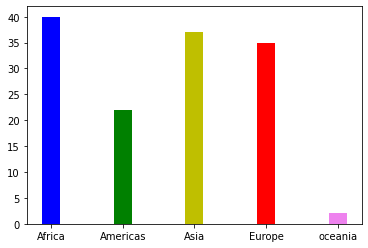

In [23]:
plt.bar('Africa', count_Africa, color = 'b', width = 0.25)
plt.bar('Americas', count_Americas, color = 'g', width = 0.25)
plt.bar('Asia', count_Asia, color = 'y', width = 0.25)
plt.bar('Europe', count_Europe, color = 'r', width = 0.25)
plt.bar('oceania', count_Oceania, color = 'violet', width = 0.25)

The one-hot encoding eliminated the presence of region column with different values changing on each row, selecting a region to apply any further explorations would be easier after applying one-hot encoding as it require only checking the attribute of the corresponding region needed to explore or visualize.

The following is an example for further visualizations using the new one-hot encoding

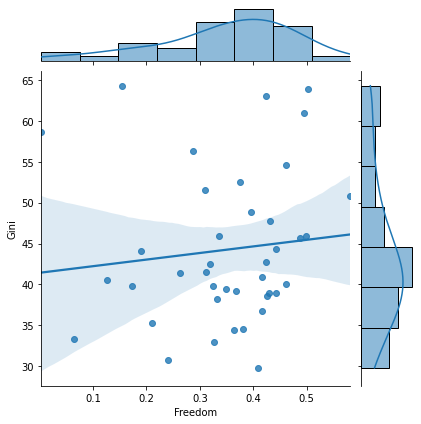

In [28]:
sns.jointplot(x=df_all_data[df_all_data['Africa'] != 0]['Freedom'], y=df_all_data[df_all_data['Africa'] != 0]['Gini'], kind="reg")

The third feature is Normalize, we can apply the normalization on the literacy rate column as the records values are skewed.

c:\users\innovator\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\innovator\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

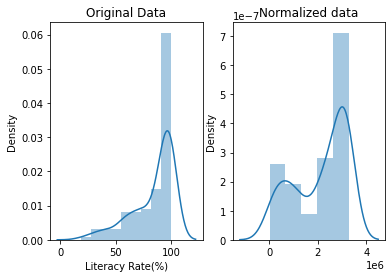

In [30]:
#get the literacy rate column only
df_country_normalize_literacy = df_all_data['Literacy Rate(%)']
#normalize using box-cox
normalized_pledges = stats.boxcox(df_country_normalize_literacy)[0]
# compare before and after normalizing
fig, ax=plt.subplots(1,2)
sns.distplot(df_country_normalize_literacy, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

The data became more normalized than before applying the normalization, the x-ranges became from 0 to nearly 2.2 while the main focus which the y-ranges became from approximately 0.1 to 1.1 instead of from 0 to 0.09 in a skewed form.

In [31]:
df_all_data['Literacy Rate(%)'] = normalized_pledges
df_all_data

Country  Schooling  Alcohol    BMI  Adult mortality  Happiness Score  \
0    Afghanistan       8.55     0.01  15.45            284.0           3.5750   
1        Albania      11.80     4.95  52.15             17.5           4.6550   
2        Algeria      12.45     0.45  50.80            124.5           5.6050   
3         Angola       7.90     6.35  18.50            367.0           3.8305   
4      Argentina      16.35     7.93  57.75            126.0           6.5740   
..           ...        ...      ...    ...              ...              ...   
131      Uruguay      15.50     6.21  58.60            118.5           6.4540   
132   Uzbekistan      11.80     1.60  37.80            184.0           6.0030   
133        Yemen       8.55     0.04  34.80            235.5           3.5930   
134       Zambia      11.25     2.41  18.60            364.5           4.5140   
135     Zimbabwe       9.80     4.43  27.70            495.5           3.8750   

     Trust (Government Corruption)   Freedom                       Sub Region  \
0                         0.061158  0.106180                    Southern Asia   
1                         0.039864  0.381499       Central and Eastern Europe   
2                         0.146096  0.210060  Middle East and Northern Africa   
3                         0.070470  0.002945               Sub-Saharan Africa   
4                         0.059740  0.471000      Latin America and Caribbean   
..                             ...       ...                              ...   
131                       0.178062  0.579392      Latin America and Caribbean   
132                       0.259000  0.658210       Central and Eastern Europe   
133                       0.064000  0.244000  Middle East and Northern Africa   
134                       0.087000  0.461603               Sub-Saharan Africa   
135                       0.089000  0.336384               Sub-Saharan Africa   

     Literacy Rate(%)  Gini    Region  Real Growth Rating(%)         eval  \
0        3.690025e+04  27.8      Asia                    3.1  underweight   
1        3.114573e+06  34.5    Europe                    7.0   overweight   
2        1.419119e+06  35.3    Africa                    3.1   overweight   
3        9.446995e+05  58.6    Africa                    5.6  underweight   
4        3.026353e+06  44.5  Americas                    3.5   overweight   
..                ...   ...       ...                    ...          ...   
131      3.048238e+06  39.7  Americas                    3.5   overweight   
132      3.193265e+06  36.7      Asia                    7.0   overweight   
133      7.244095e+05  37.7      Asia                    3.8   overweight   
134      5.828507e+05  54.6    Africa                    6.0      healthy   
135      9.073389e+05  45.9    Africa                    4.8   overweight   

     Africa  Americas  Asia  Europe  Oceania  
0         0         0     1       0        0  
1         0         0     0       1        0  
2         1         0     0       0        0  
3         1         0     0       0        0  
4         0         1     0       0        0  
..      ...       ...   ...     ...      ...  
131       0         1     0       0        0  
132       0         0     1       0        0  
133       0         0     1       0        0  
134       1         0     0       0        0  
135       1         0     0       0        0  

[136 rows x 19 columns]

Other feature could be done is applying scaling on the "Adult mortality" attribute. The scaler used is min-max scaler.

c:\users\innovator\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\innovator\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled_min-max data')

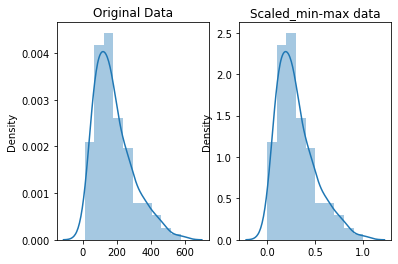

In [35]:
# Select the usd_goal_real column
adult_mortality_original = df_all_data[['Adult mortality']]
adult_mortality_scaled = MinMaxScaler().fit_transform(adult_mortality_original)
# Plot the original & scaled
fig, ax=plt.subplots(1,2)
sns.distplot(adult_mortality_original, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(adult_mortality_scaled, ax=ax[1])
ax[1].set_title("Scaled_min-max data")

The x-ranges scaled from 0-600 to 0-1, and the y-ranges scaled from 0-0.005 to 0 to 2.5 using the min-max scaler

In [36]:
df_all_data['Adult mortality'] = adult_mortality_scaled
df_all_data

Country  Schooling  Alcohol    BMI  Adult mortality  Happiness Score  \
0    Afghanistan       8.55     0.01  15.45         0.481810           3.5750   
1        Albania      11.80     4.95  52.15         0.008873           4.6550   
2        Algeria      12.45     0.45  50.80         0.198758           5.6050   
3         Angola       7.90     6.35  18.50         0.629104           3.8305   
4      Argentina      16.35     7.93  57.75         0.201420           6.5740   
..           ...        ...      ...    ...              ...              ...   
131      Uruguay      15.50     6.21  58.60         0.188110           6.4540   
132   Uzbekistan      11.80     1.60  37.80         0.304348           6.0030   
133        Yemen       8.55     0.04  34.80         0.395741           3.5930   
134       Zambia      11.25     2.41  18.60         0.624667           4.5140   
135     Zimbabwe       9.80     4.43  27.70         0.857143           3.8750   

     Trust (Government Corruption)   Freedom                       Sub Region  \
0                         0.061158  0.106180                    Southern Asia   
1                         0.039864  0.381499       Central and Eastern Europe   
2                         0.146096  0.210060  Middle East and Northern Africa   
3                         0.070470  0.002945               Sub-Saharan Africa   
4                         0.059740  0.471000      Latin America and Caribbean   
..                             ...       ...                              ...   
131                       0.178062  0.579392      Latin America and Caribbean   
132                       0.259000  0.658210       Central and Eastern Europe   
133                       0.064000  0.244000  Middle East and Northern Africa   
134                       0.087000  0.461603               Sub-Saharan Africa   
135                       0.089000  0.336384               Sub-Saharan Africa   

     Literacy Rate(%)  Gini    Region  Real Growth Rating(%)         eval  \
0        3.690025e+04  27.8      Asia                    3.1  underweight   
1        3.114573e+06  34.5    Europe                    7.0   overweight   
2        1.419119e+06  35.3    Africa                    3.1   overweight   
3        9.446995e+05  58.6    Africa                    5.6  underweight   
4        3.026353e+06  44.5  Americas                    3.5   overweight   
..                ...   ...       ...                    ...          ...   
131      3.048238e+06  39.7  Americas                    3.5   overweight   
132      3.193265e+06  36.7      Asia                    7.0   overweight   
133      7.244095e+05  37.7      Asia                    3.8   overweight   
134      5.828507e+05  54.6    Africa                    6.0      healthy   
135      9.073389e+05  45.9    Africa                    4.8   overweight   

     Africa  Americas  Asia  Europe  Oceania  
0         0         0     1       0        0  
1         0         0     0       1        0  
2         1         0     0       0        0  
3         1         0     0       0        0  
4         0         1     0       0        0  
..      ...       ...   ...     ...      ...  
131       0         1     0       0        0  
132       0         0     1       0        0  
133       0         0     1       0        0  
134       1         0     0       0        0  
135       1         0     0       0        0  

[136 rows x 19 columns]